# **Students' dropout and academic success**
---
**Kelompok 9**

**Muhammad Ariq Farhan**

**Lutfiya Hasna Izza Rahima**

## Tentang [Dataset](https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention)

Dataset ini berisi tentang kumpulan mahasiswa yang terdaftar di perguruan tinggi di seluruh dunia yang mencakup data demografis, faktor sosial-ekonomi, dan informasi kinerja akademik yang dapat digunakan untuk menganalisis kemungkinan prediksi putus sekolah dan keberhasilan akademik mahasiswa. 

## Business Understanding

Apa masalahnya? <br>
Ketika suatu organisasi memutuskan untuk memberi dukungan beasiswa kepada mahasiswa. Mereka memiliki 2 kemungkinan : <br>


*   Orang yang dipilih tidak mampu melanjutkan kuliahnya dan memutuskan DROPOUT
*  Orang yang dipilih mampu melanjutkan kuliahnya hingga LULUS


# Data Collection & Understanding

Data Understanding adalah tahapan awal untuk memahami data yang telah dikumpulkan secara lebih mendalam, mengidentifikasi kualitas data, dan menentukan apakah data tersebut dapat digunakan untuk analisis yang diinginkan

## Mengimport Library dan Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengimport Library serta Dataset untuk memanipulasi dan visualisasi data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency


data = pd.read_csv('/content/drive/MyDrive/BCC/dataset.csv')

## Informasi Dataset

In [ ]:
data.shape

(4424, 35)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
data.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [ ]:
data.describe()

Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571          6.886980           1.727848     9.899186   
std          0.605747          5.298964           1.313793     4.331792   
min          1.000000          1.000000           0.000000     1.000000   
25%          1.000000          1.000000           1.000000     6.000000   
50%          1.000000          8.000000           1.000000    10.000000   
75%          1.000000         12.000000           2.000000    13.000000   
max          6.000000         18.000000           9.000000    17.000000   

       Daytime/evening attendance  Previous qualification  Nacionality  \
count                 4424.000000             4424.000000  4424.000000   
mean                     0.890823                2.531420     1.254521   
std                      0.311897                3.963707     1.748447   
min                      0.000000                1.000000     1.000000   
25%                      1.000000                1.000000     1.000000   
50%                      1.000000                1.000000     1.000000   
75%                      1.000000                1.000000     1.000000   
max                      1.000000               17.000000    21.000000   

       Mother's qualification  Father's qualification  Mother's occupation  \
count             4424.000000             4424.000000          4424.000000   
mean                12.322107               16.455244             7.317812   
std                  9.026251               11.044800             3.997828   
min                  1.000000                1.000000             1.000000   
25%                  2.000000                3.000000             5.000000   
50%                 13.000000               14.000000             6.000000   
75%                 22.000000               27.000000            10.000000   
max                 29.000000               34.000000            32.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                     4424.000000   
mean   ...                                        0.137658   
std    ...                                        0.690880   
min    ...                                        0.000000   
25%    ...                                        0.000000   
50%    ...                                        0.000000   
75%    ...                                        0.000000   
max    ...                                       12.000000   

       Curricular units 2nd sem (credited)  \
count                          4424.000000   
mean                              0.541817   
std                               1.918546   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                          4424.000000   
mean                              6.232143   
std                               2.195951   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               7.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                             4424.000000   
mean                                 8.063291   
std                                  3.947951   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                 10.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                          4424.000000        

In [ ]:
data.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

In [ ]:
data.describe(include='O')

Target
count       4424
unique         3
top     Graduate
freq        2209

In [ ]:
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
data_null = data.isna().sum()
data_null

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [ ]:
duplikat = data.duplicated().sum()
duplikat

0

### Insight

1.   Terdapat 4424 Baris
2.   Data yang diperoleh sudah cukup bersih (tidak ada duplikat, tidak ada missing values)
3.   Beberapa fitur sudah diubah menjadi kategorikal



### Deskripsi Data
* Marital status: The marital status of the student. (Categorical)
* Application mode: The method of application used by the student. (Categorical)
* Application order: The order in which the student applied. (Numerical)
* Course: The course taken by the student. (Categorical)
* Daytime/evening attendance: Whether the student attends classes during the day or in the evening. (Categorical)
* Previous qualification: The qualification obtained by the student before enrolling in higher education. (Categorical)
* Nacionality: The nationality of the student. (Categorical)
* Mother's qualification: The qualification of the student's mother. (Categorical)
* Father's qualification: The qualification of the student's father. (Categorical)
* Mother's occupation: The occupation of the student's mother. (Categorical)
* Father's occupation: The occupation of the student's father. (Categorical)
* Displaced: Whether the student is a displaced person. (Categorical)
* Educational special needs: Whether the student has any special educational needs. (Categorical)
* Debtor: Whether the student is a debtor. (Categorical)
* Tuition fees up to date: Whether the student's tuition fees are up to date. (Categorical)
* Gender: The gender of the student. (Categorical)
* Scholarship holder: Whether the student is a scholarship holder. (Categorical)
* Age at enrollment: The age of the student at the time of enrollment. (Numerical)
* International: Whether the student is an international student. (Categorical)
* Curricular units 1st sem (credited): The number of curricular units credited by the student in the first semester. (Numerical)
* Curricular units 1st sem (enrolled): The number of curricular units enrolled by the student in the first semester. (Numerical)
* Curricular units 1st sem (evaluations): The number of curricular units evaluated by the student in the first semester. (Numerical)
* Curricular units 1st sem (approved): The number of curricular units approved by the student in the first semester. (Numerical)

# Data Preprocessing
Persiapan data sebelum melakukan analisis atau pemodelan data

## Exploratory Data Analysist

In [ ]:
def count_plot(data, y, title, **sns_kwargs):
    value_counts = data[y].value_counts()
    percentage = value_counts / value_counts.sum()
    percentage = percentage.apply("{:.2%}".format)

    c = sns.countplot(data=data, y=y, order=value_counts.index, **sns_kwargs)
    c.set_title(title, fontdict={'fontsize': 22, 'fontweight' : 'bold'})
    plt.ylabel("")
    plt.show()
    print(percentage)

def distribution_plot(data, x, title, **sns_kwargs):
    c= sns.histplot(data=data, x=x, kde=True, **sns_kwargs)
    c.set_title(title, fontdict={'fontsize': 22, 'fontweight' : 'bold'})
    plt.ylabel("")
    plt.show()

def box_plot(data, x, y, title, **sns_kwargs):
    c=sns.boxplot(data=data, x=x, y=y, **sns_kwargs)
    c.set_title(title, fontdict={'fontsize': 22, 'fontweight' : 'bold'})
    plt.ylabel("")
    plt.show()

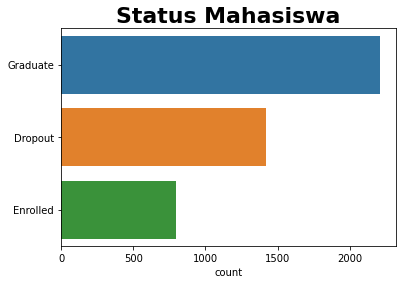

Graduate    49.93%
Dropout     32.12%
Enrolled    17.95%
Name: Target, dtype: object


Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [ ]:
count_plot(data, y="Target", title = "Status Mahasiswa")
data.loc[:, 'Target'].value_counts()

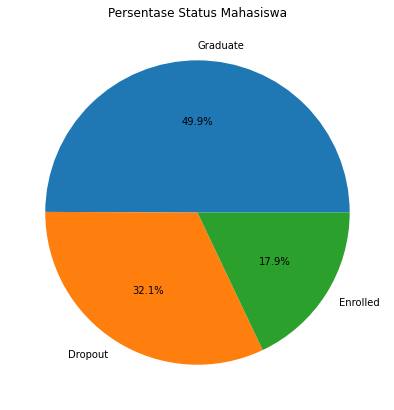

In [ ]:
pie_stats = data['Target'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(pie_stats, labels=pie_stats.index, autopct='%1.1f%%')
plt.title('Persentase Status Mahasiswa')
plt.show()

In [ ]:
eda = data.copy()

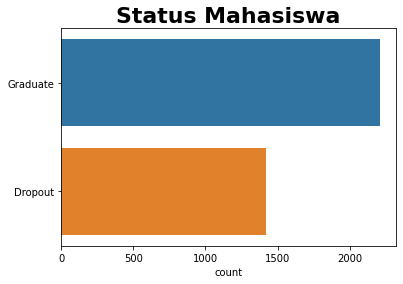

Graduate    60.85%
Dropout     39.15%
Name: Target, dtype: object


In [ ]:
eda = eda[eda['Target']!='Enrolled']
count_plot(eda, y="Target",title="Status Mahasiswa" )

### Analisis Demografi

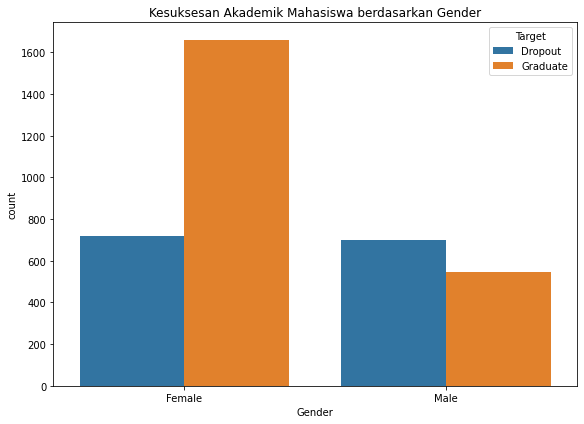

In [ ]:
# dropout_by_gender = pd.crosstab(eda['Gender'], eda['Target'], normalize='index').loc[:, 'Dropout']
# graduate_by_gender = pd.crosstab(eda['Gender'], eda['Target'], normalize='index').loc[:, 'Graduate']
# labels = ['Female', 'Male']

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[2, 1])

# ax1 = fig.add_subplot(gs[3])
# ax1.pie(dropout_by_gender, labels=labels, autopct='%1.1f%%', startangle=90)
# ax1.set_title('Ratio of Dropouts by Gender')

# ax2 = fig.add_subplot(gs[1])
# ax2.pie(graduate_by_gender, labels=labels, autopct='%1.1f%%', startangle=90)
# ax2.set_title('Ratio of Graduates by Gender')

ax3 = fig.add_subplot(gs[:, 0])
sns.countplot(data=eda, x='Gender', hue='Target', hue_order=['Dropout', 'Graduate'],ax=ax3)
ax3.set_xticklabels(['Female','Male'])
ax3.set_title("Kesuksesan Akademik Mahasiswa berdasarkan Gender")

plt.tight_layout()
plt.show()

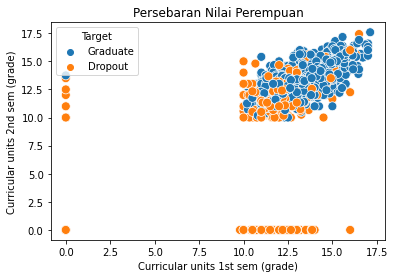

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=eda[eda['Gender']==0], x='Curricular units 1st sem (grade)', y='Curricular units 2nd sem (grade)', hue='Target', s=80)
plt.title('Persebaran Nilai Perempuan')
plt.show()

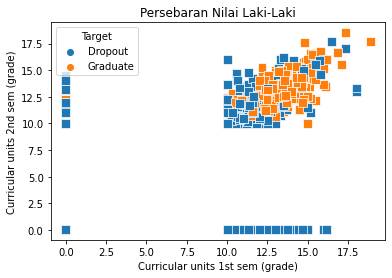

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=eda[eda['Gender']==1], x='Curricular units 1st sem (grade)', y='Curricular units 2nd sem (grade)', hue='Target', s=80, marker='s')
plt.title('Persebaran Nilai Laki-Laki')
plt.show()

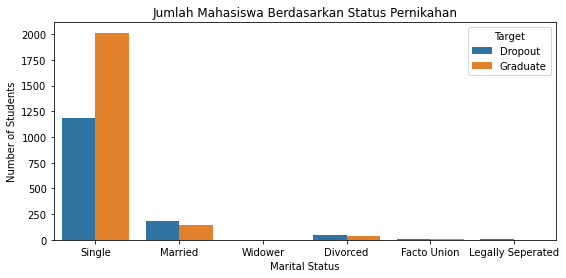

In [ ]:
plt.figure(figsize=(9,4))

sns.countplot(data=eda, x='Marital status', hue='Target', hue_order=['Dropout', 'Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single','Married','Widower','Divorced','Facto Union','Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.title('Jumlah Mahasiswa Berdasarkan Status Pernikahan')
plt.show()

Text(0.5, 1.0, 'Jumlah Mahasiswa Kesuksesan Akademik berdasarkan Jurusan')

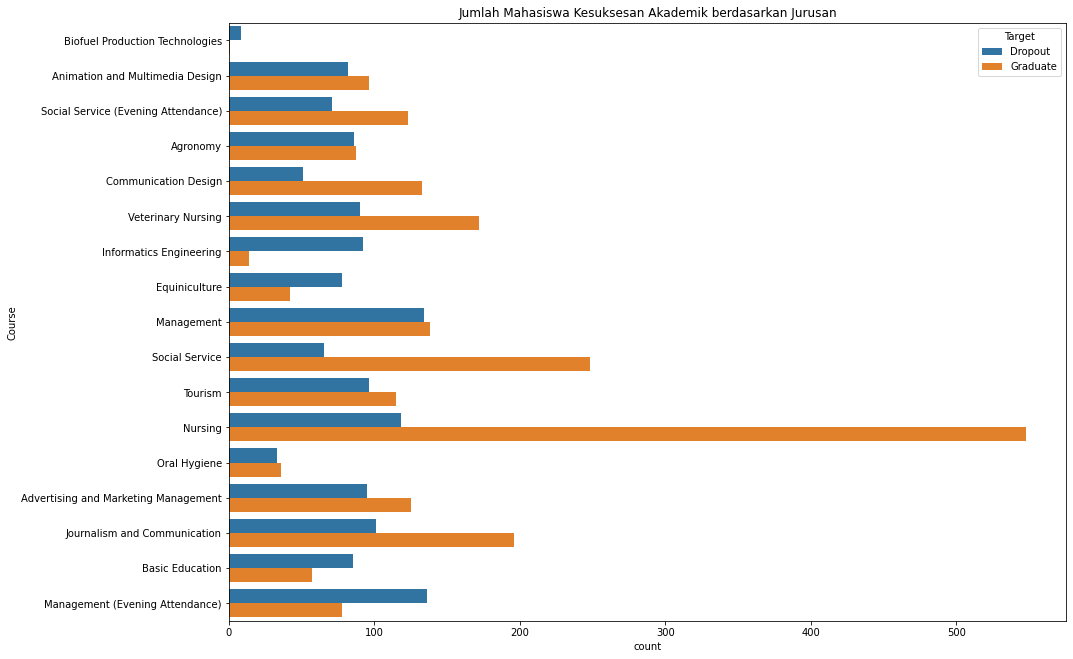

In [ ]:
plt.figure(figsize=(15,11))

sns.countplot(data=eda, y='Course', hue='Target', hue_order=['Dropout', 'Graduate'])
plt.yticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], labels=['Biofuel Production Technologies','Animation and Multimedia Design','Social Service (Evening Attendance)','Agronomy','Communication Design','Veterinary Nursing','Informatics Engineering','Equiniculture','Management','Social Service','Tourism','Nursing','Oral Hygiene','Advertising and Marketing Management','Journalism and Communication','Basic Education','Management (Evening Attendance)'])
plt.title('Jumlah Mahasiswa Kesuksesan Akademik berdasarkan Jurusan')

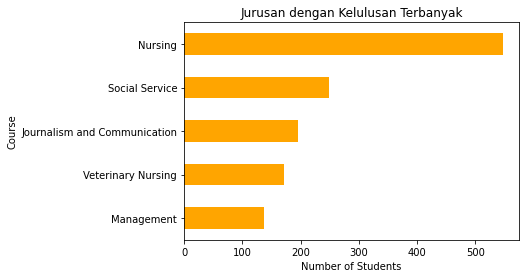

In [ ]:
student_course = eda.groupby(["Course", 'Target']).size().reset_index()
student_course = student_course.pivot(index='Course', columns='Target', values=0).fillna(0)
student_course = student_course.rename(index={1:'Biofuel Production Technologies',2:'Animation and Multimedia Design',3:'Social Service (Evening Attendance)',4:'Agronomy',5:'Communication Design',6:'Veterinary Nursing',7:'Informatics Engineering',8:'Equiniculture',9:'Management',10:'Social Service',11:'Tourism',12:'Nursing',13:'Oral Hygiene',14:'Advertising and Marketing Management',15:'Journalism and Communication',16:'Basic Education',17:'Management (Evening Attendance)'})

student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course_top10 = student_course_sorted[-10:]

top_courses_graduate = student_course.sort_values(by='Graduate', ascending=False).head(5).index.tolist()
top_courses_dropout = student_course.sort_values(by='Dropout', ascending=False).head(5).index.tolist()

student_course['Graduate'].loc[top_courses_graduate].sort_values(ascending=True).plot(kind='barh', color='orange')

plt.xlabel('Number of Students')
plt.ylabel("Course")
plt.title('Jurusan dengan Kelulusan Terbanyak')
plt.show()


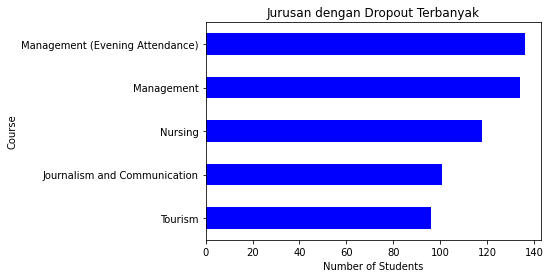

In [ ]:
student_course['Dropout'].loc[top_courses_dropout].sort_values(ascending=True).plot(kind='barh', color='blue')

plt.xlabel('Number of Students')
plt.ylabel("Course")
plt.title('Jurusan dengan Dropout Terbanyak')
plt.show()

<Figure size 576x432 with 0 Axes>

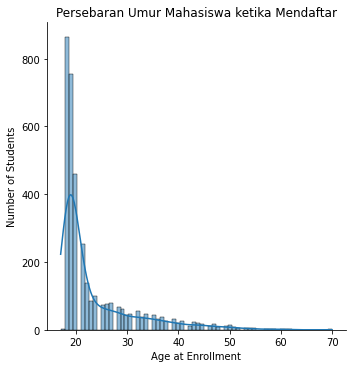

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(data=eda, x='Age at enrollment', kde=True)
plt.xlabel('Age at Enrollment')
plt.ylabel('Number of Students')
plt.title('Persebaran Umur Mahasiswa ketika Mendaftar')
plt.show()

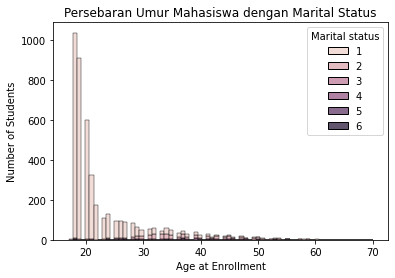

In [ ]:
sns.histplot(data=data, x="Age at enrollment", hue="Marital status", multiple="stack")
plt.xlabel('Age at Enrollment')
plt.ylabel('Number of Students')
plt.title('Persebaran Umur Mahasiswa dengan Marital Status')
plt.show()

### Analisis Sosio-Ekonomi

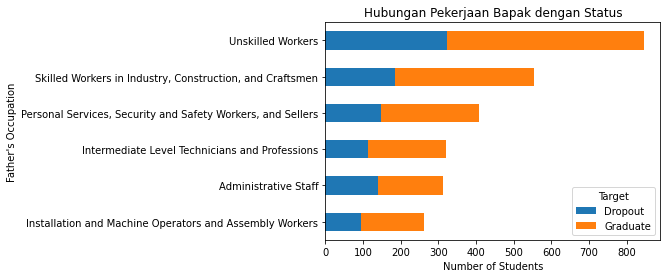

In [ ]:
student_foccupation = eda.groupby(["Father's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Father's occupation", values=0)

student_foccupation = student_foccupation.rename(index={1:'Student',2:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',3:'Specialists in Intellectual and Scientific Activities',4:'Intermediate Level Technicians and Professions',5:'Administrative Staff',6:'Personal Services, Security and Safety Workers, and Sellers',7:'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',8:'Skilled Workers in Industry, Construction, and Craftsmen',9:'Installation and Machine Operators and Assembly Workers',10:'Unskilled Workers',11:'Armed Forces Professions',12:'Other Situation',13:'(blank)',14:'Armed Forces Officers',15:'Armed Forces Sergeants',16:'Other Armed Forces personnel',17:'Directors of Administrative and Commercial Services',18:'Hotel, Catering, Trade, and Other Services Directors',19:'Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques',20:'Health Professionals',21:'Teachers',22:'Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial relations',23:'Intermediate Level Science and Engineering Technicians and Professions',24:'Technicians and Professionals of Intermediate Level of Health',25:'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services',26:'Information and Communication Technology Technicians',27:'Office Workers, Secretaries in General, and Data Processing Operators',28:'Data, Accounting, Statistical, Financial Services, and Registry-related Operators',29:'Other Administrative Support Staff',30:'Personal Service Workers',31:'Sellers',32:'Personal Care workers and The Like',33:'Protection and Security Services Personnel',34:'Market-oriented Farmers and Skilled Agricultural and Animal Production Workers',35:'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence',36:'Skilled Construction Workers and The Like, except Electricians',37:'Skilled Workers in Metallurgy, Metalworking, and Similar',38:'Skilled workers in Electricity and Electronics',39:'Workers in Food Processing, Woodworking, and Clothing and Other industries and Crafts',40:'Fixed Plant and Machine Operators',41:'Assembly Workers',42:'Vehicle Drivers and Mobile Equipment Operators',43:'Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry',44:'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport',45:'Meal Preparation Assistants',46:'Street Vendors (except food) and Street Service Providers'})

student_foccupation_total = student_foccupation.sum(axis=1)
student_foccupation_sorted = student_foccupation_total.sort_values(ascending=True)
student_foccupation_top10 = student_foccupation_sorted[36:]
student_foccupation.loc[student_foccupation_top10.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel("Father's Occupation")
plt.title('Hubungan Pekerjaan Bapak dengan Status')
plt.show()


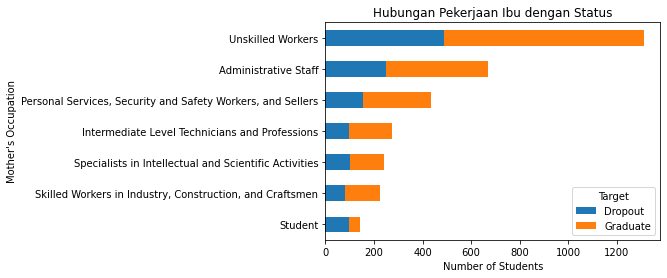

In [ ]:
student_foccupation = eda.groupby(["Mother's occupation", 'Target']).size().reset_index().pivot(columns='Target', index="Mother's occupation", values=0)

student_foccupation = student_foccupation.rename(index={1:'Student',2:'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',3:'Specialists in Intellectual and Scientific Activities',4:'Intermediate Level Technicians and Professions',5:'Administrative Staff',6:'Personal Services, Security and Safety Workers, and Sellers',7:'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',8:'Skilled Workers in Industry, Construction, and Craftsmen',9:'Installation and Machine Operators and Assembly Workers',10:'Unskilled Workers',11:'Armed Forces Professions',12:'Other Situation',13:'(blank)',14:'Armed Forces Officers',15:'Armed Forces Sergeants',16:'Other Armed Forces personnel',17:'Directors of Administrative and Commercial Services',18:'Hotel, Catering, Trade, and Other Services Directors',19:'Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques',20:'Health Professionals',21:'Teachers',22:'Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial relations',23:'Intermediate Level Science and Engineering Technicians and Professions',24:'Technicians and Professionals of Intermediate Level of Health',25:'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services',26:'Information and Communication Technology Technicians',27:'Office Workers, Secretaries in General, and Data Processing Operators',28:'Data, Accounting, Statistical, Financial Services, and Registry-related Operators',29:'Other Administrative Support Staff',30:'Personal Service Workers',31:'Sellers',32:'Personal Care workers and The Like',33:'Protection and Security Services Personnel',34:'Market-oriented Farmers and Skilled Agricultural and Animal Production Workers',35:'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence',36:'Skilled Construction Workers and The Like, except Electricians',37:'Skilled Workers in Metallurgy, Metalworking, and Similar',38:'Skilled workers in Electricity and Electronics',39:'Workers in Food Processing, Woodworking, and Clothing and Other industries and Crafts',40:'Fixed Plant and Machine Operators',41:'Assembly Workers',42:'Vehicle Drivers and Mobile Equipment Operators',43:'Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry',44:'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport',45:'Meal Preparation Assistants',46:'Street Vendors (except food) and Street Service Providers'})

student_foccupation_total = student_foccupation.sum(axis=1)
student_foccupation_sorted = student_foccupation_total.sort_values(ascending=True)
student_foccupation_top10 = student_foccupation_sorted[22:]
student_foccupation.loc[student_foccupation_top10.index].plot(kind='barh', stacked=True)

plt.xlabel('Number of Students')
plt.ylabel("Mother's Occupation")
plt.title('Hubungan Pekerjaan Ibu dengan Status')
plt.show()


Scholarship Holder <br>
Bagaimana korelasi antara penerima beasiswa dengan status akademiknya

In [ ]:
dropout_by_scholarship = pd.crosstab(eda['Scholarship holder'], eda['Target'], normalize='index').loc[:, 'Dropout']
graduate_by_scholarship = pd.crosstab(eda['Scholarship holder'], eda['Target'], normalize='index').loc[:, 'Graduate']
labels = ['No', 'Yes']

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[3])
ax1.pie(dropout_by_scholarship, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Ratio of Dropouts by Scholarship holder')

ax2 = fig.add_subplot(gs[1])
ax2.pie(graduate_by_scholarship, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Ratio of Graduates by Scholarship holder')

ax3 = fig.add_subplot(gs[:, 0])
sns.countplot(data=eda, x='Scholarship holder', hue='Target', hue_order=['Dropout', 'Graduate'],ax=ax3)
ax3.set_xticklabels(['No','Yes'])
ax3.set_title("Kesuksesan Akademik Mahasiswa berdasarkan Pemegang Beasiswa")

plt.tight_layout()
plt.show()

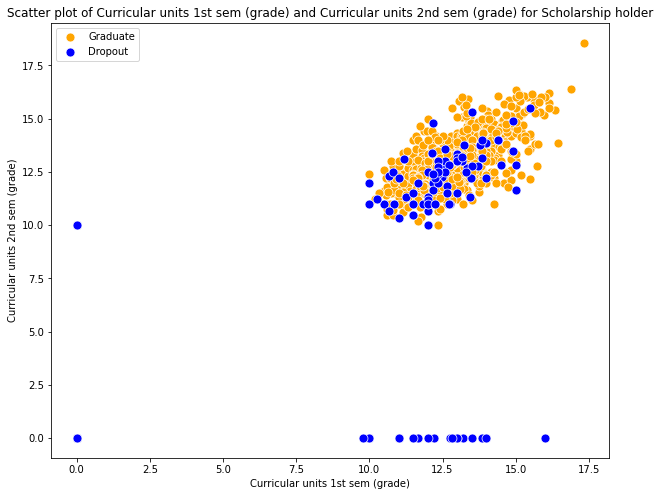

In [ ]:
graduate_holder = eda.loc[(eda['Scholarship holder'] == 1) & (eda['Target'] == 'Graduate')]
dropout_holder = eda.loc[(eda['Scholarship holder'] == 1) & (eda['Target'] == 'Dropout')]

plt.figure(figsize=(10,8))
sns.scatterplot(data=graduate_holder, x='Curricular units 1st sem (grade)', y='Curricular units 2nd sem (grade)', color='orange', label='Graduate', s=80)
sns.scatterplot(data=dropout_holder, x='Curricular units 1st sem (grade)', y='Curricular units 2nd sem (grade)', color='blue', label='Dropout', s=80)
plt.xlabel('Curricular units 1st sem (grade)')
plt.ylabel('Curricular units 2nd sem (grade)')
plt.title('Scatter plot of Curricular units 1st sem (grade) and Curricular units 2nd sem (grade) for Scholarship holder')
plt.legend()
plt.show()

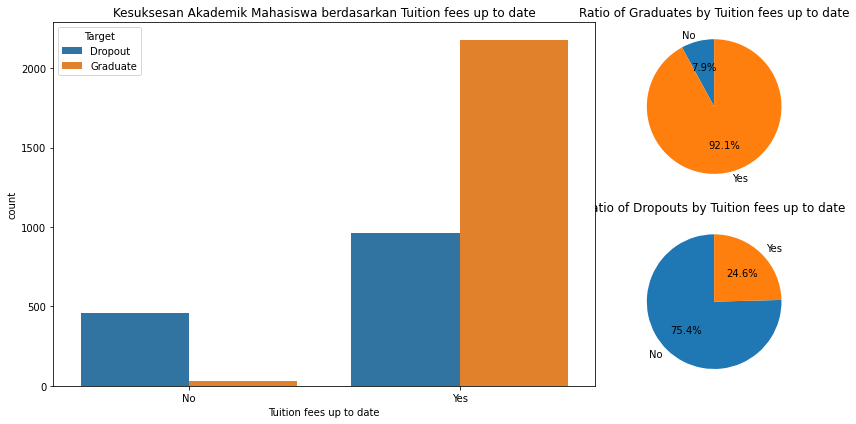

In [ ]:
dropout_by_tuition = pd.crosstab(eda['Tuition fees up to date'], eda['Target'], normalize='index').loc[:, 'Dropout']
graduate_by_tuition = pd.crosstab(eda['Tuition fees up to date'], eda['Target'], normalize='index').loc[:, 'Graduate']
labels = ['No', 'Yes']

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[3])
ax1.pie(dropout_by_tuition, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Ratio of Dropouts by Tuition fees up to date')

ax2 = fig.add_subplot(gs[1])
ax2.pie(graduate_by_tuition, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Ratio of Graduates by Tuition fees up to date')

ax3 = fig.add_subplot(gs[:, 0])
sns.countplot(data=eda, x='Tuition fees up to date', hue='Target', hue_order=['Dropout', 'Graduate'],ax=ax3)
ax3.set_xticklabels(['No','Yes'])
ax3.set_title("Kesuksesan Akademik Mahasiswa berdasarkan Tuition fees up to date")

plt.tight_layout()
plt.show()

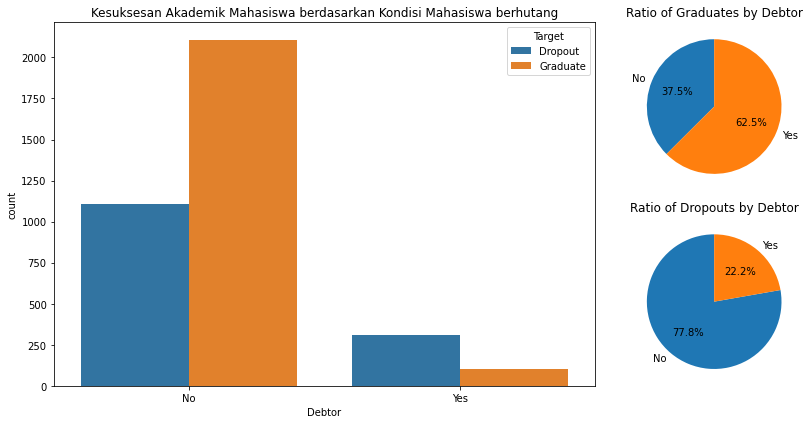

In [ ]:
dropout_by_tuition = pd.crosstab(eda['Debtor'], eda['Target'], normalize='index').loc[:, 'Dropout']
graduate_by_tuition = pd.crosstab(eda['Debtor'], eda['Target'], normalize='index').loc[:, 'Graduate']
labels = ['No', 'Yes']

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[3])
ax1.pie(dropout_by_scholarship, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Ratio of Dropouts by Debtor')

ax2 = fig.add_subplot(gs[1])
ax2.pie(graduate_by_scholarship, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Ratio of Graduates by Debtor')

ax3 = fig.add_subplot(gs[:, 0])
sns.countplot(data=eda, x='Debtor', hue='Target', hue_order=['Dropout', 'Graduate'],ax=ax3)
ax3.set_xticklabels(['No','Yes'])
ax3.set_title("Kesuksesan Akademik Mahasiswa berdasarkan Kondisi Mahasiswa berhutang")

plt.tight_layout()
plt.show()

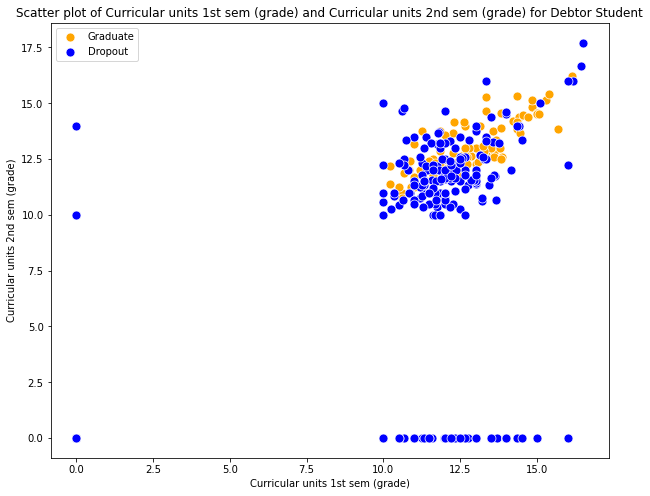

In [ ]:
graduate_debtor = eda.loc[(eda['Debtor'] == 1) & (eda['Target'] == 'Graduate')]
dropout_debtor = eda.loc[(eda['Debtor'] == 1) & (eda['Target'] == 'Dropout')]

plt.figure(figsize=(10,8))
sns.scatterplot(data=graduate_debtor, x='Curricular units 1st sem (grade)', y='Curricular units 2nd sem (grade)', color='orange', label='Graduate', s=80)
sns.scatterplot(data=dropout_debtor, x='Curricular units 1st sem (grade)', y='Curricular units 2nd sem (grade)', color='blue', label='Dropout', s=80)
plt.xlabel('Curricular units 1st sem (grade)')
plt.ylabel('Curricular units 2nd sem (grade)')
plt.title('Scatter plot of Curricular units 1st sem (grade) and Curricular units 2nd sem (grade) for Debtor Student')
plt.legend()
plt.show()

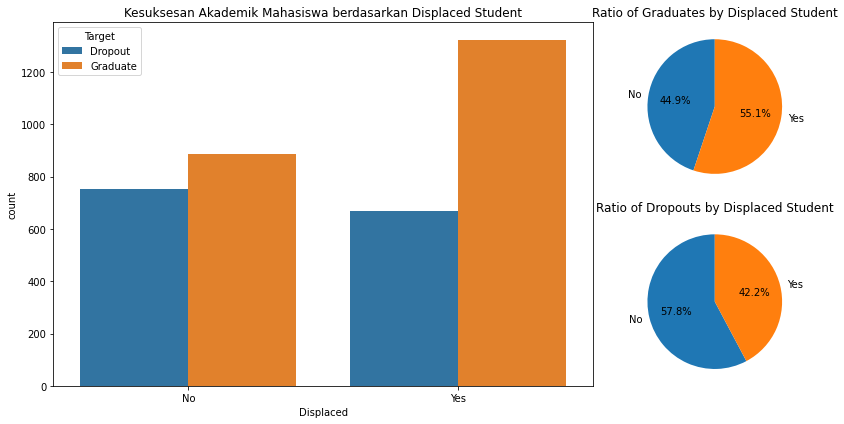

In [ ]:
dropout_by_tuition = pd.crosstab(eda['Displaced'], eda['Target'], normalize='index').loc[:, 'Dropout']
graduate_by_tuition = pd.crosstab(eda['Displaced'], eda['Target'], normalize='index').loc[:, 'Graduate']
labels = ['No', 'Yes']

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[3])
ax1.pie(dropout_by_tuition, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Ratio of Dropouts by Displaced Student')

ax2 = fig.add_subplot(gs[1])
ax2.pie(graduate_by_tuition, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Ratio of Graduates by Displaced Student')

ax3 = fig.add_subplot(gs[:, 0])
sns.countplot(data=eda, x='Displaced', hue='Target', hue_order=['Dropout', 'Graduate'],ax=ax3)
ax3.set_xticklabels(['No','Yes'])
ax3.set_title("Kesuksesan Akademik Mahasiswa berdasarkan Displaced Student")

plt.tight_layout()
plt.show()

<Figure size 576x432 with 0 Axes>

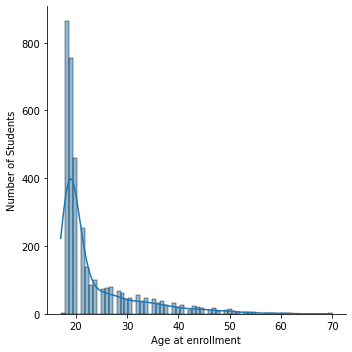

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(data=eda, x='Age at enrollment', kde=True)
plt.xlabel('Age at enrollment')
plt.ylabel('Number of Students')
plt.show()

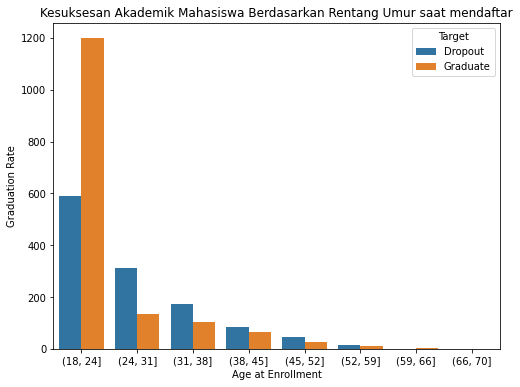

In [ ]:
# Membuat kolom baru dengan rentang GDP
eda['Age_atEnrollment'] = pd.cut(eda['Age at enrollment'], bins=[18, 24, 31, 38, 45,52,59,66,70])

# Menghitung tingkat kelulusan berdasarkan rentang GDP
grad_rate_by_ur = eda.groupby('Age_atEnrollment')['Target'].apply(lambda x: (x == 'Graduate').sum() / len(x))

# Plot countplot dengan tingkat kelulusan
plt.figure(figsize=(8,6))
sns.countplot(data=eda, x='Age_atEnrollment', hue='Target', hue_order=['Dropout', 'Graduate'])
plt.xlabel('Age at Enrollment')
plt.ylabel('Number of Students')
plt.title('Kesuksesan Akademik Mahasiswa Berdasarkan Rentang Umur saat mendaftar')
plt.ylabel('Graduation Rate')
plt.show()

### Analisis Makro Ekonomi

Unemployment rate <br>
Korelasi antara status pekerja dengan status dropout mahasiswa

<Figure size 576x432 with 0 Axes>

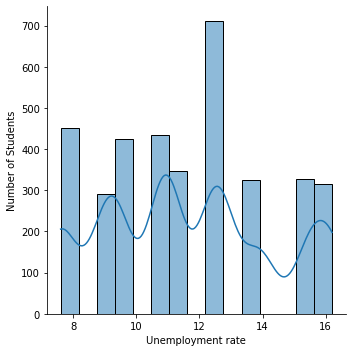

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(data=eda, x='Unemployment rate', kde=True)
plt.xlabel('Unemployment rate')
plt.ylabel('Number of Students')
plt.show()

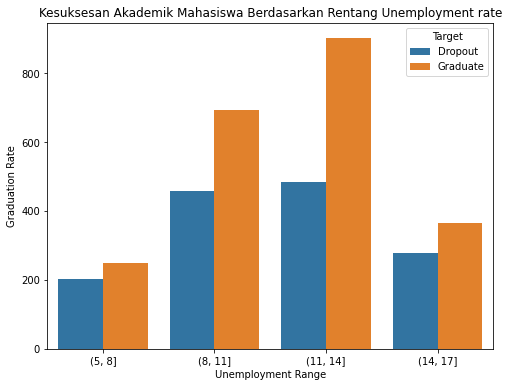

In [ ]:
# Membuat kolom baru dengan rentang GDP
eda['Unemployment_rate'] = pd.cut(eda['Unemployment rate'], bins=[5, 8, 11, 14, 17])

# Menghitung tingkat kelulusan berdasarkan rentang GDP
grad_rate_by_ur = eda.groupby('Unemployment_rate')['Target'].apply(lambda x: (x == 'Graduate').sum() / len(x))

# Plot countplot dengan tingkat kelulusan
plt.figure(figsize=(8,6))
sns.countplot(data=eda, x='Unemployment_rate', hue='Target', hue_order=['Dropout', 'Graduate'])
plt.xlabel('Unemployment Range')
plt.ylabel('Number of Students')
plt.title('Kesuksesan Akademik Mahasiswa Berdasarkan Rentang Unemployment rate')
plt.ylabel('Graduation Rate')
plt.show()

<Figure size 576x432 with 0 Axes>

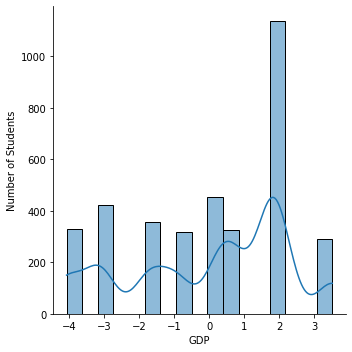

In [ ]:
plt.figure(figsize=(8,6))
sns.displot(data=eda, x='GDP', kde=True)
plt.xlabel('GDP')
plt.ylabel('Number of Students')
plt.show()

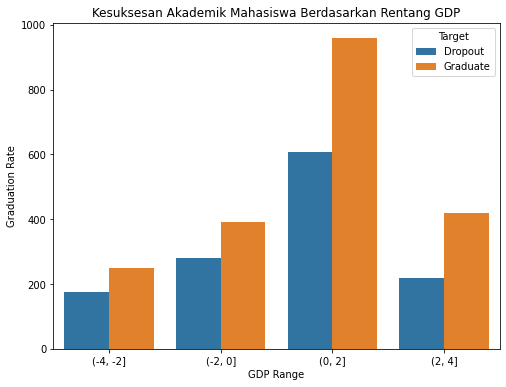

In [ ]:
# Membuat kolom baru dengan rentang GDP
eda['GDP_range'] = pd.cut(eda['GDP'], bins=[-4, -2, 0, 2, 4])

# Menghitung tingkat kelulusan berdasarkan rentang GDP
grad_rate_by_gdp = eda.groupby('GDP_range')['Target'].apply(lambda x: (x == 'Graduate').sum() / len(x))

# Plot countplot dengan tingkat kelulusan
plt.figure(figsize=(8,6))
sns.countplot(data=eda, x='GDP_range', hue='Target', hue_order=['Dropout', 'Graduate'])
plt.xlabel('GDP Range')
plt.ylabel('Number of Students')
plt.title('Kesuksesan Akademik Mahasiswa Berdasarkan Rentang GDP')
plt.ylabel('Graduation Rate')
plt.show()

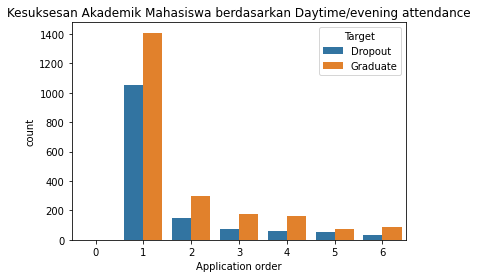

In [ ]:
sns.countplot(data=eda, x='Application order', hue='Target', hue_order=['Dropout', 'Graduate'])
plt.xticks(eda['Application order'].unique())
plt.title("Kesuksesan Akademik Mahasiswa berdasarkan Daytime/evening attendance")
plt.show()

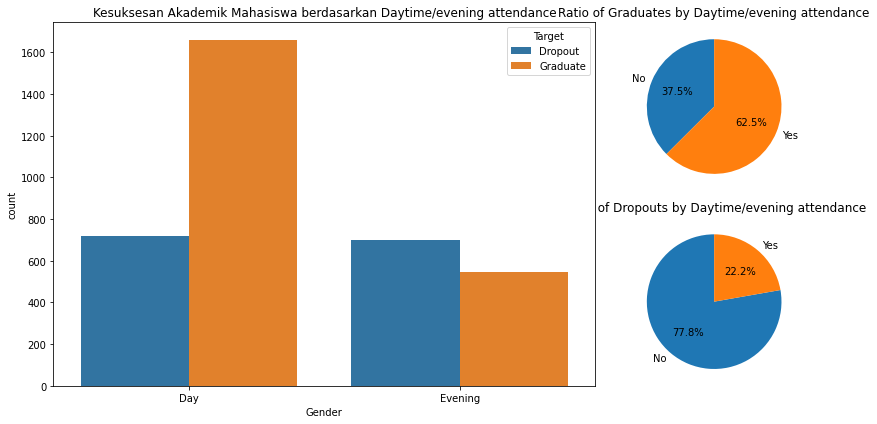

In [ ]:
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(nrows=2, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[3])
ax1.pie(dropout_by_scholarship, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Ratio of Dropouts by Daytime/evening attendance')

ax2 = fig.add_subplot(gs[1])
ax2.pie(graduate_by_scholarship, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Ratio of Graduates by Daytime/evening attendance')

ax3 = fig.add_subplot(gs[:, 0])
sns.countplot(data=eda, x='Gender', hue='Target', hue_order=['Dropout', 'Graduate'],ax=ax3)
ax3.set_xticklabels(['Day','Evening'])
ax3.set_title("Kesuksesan Akademik Mahasiswa berdasarkan Daytime/evening attendance")

plt.tight_layout()
plt.show()

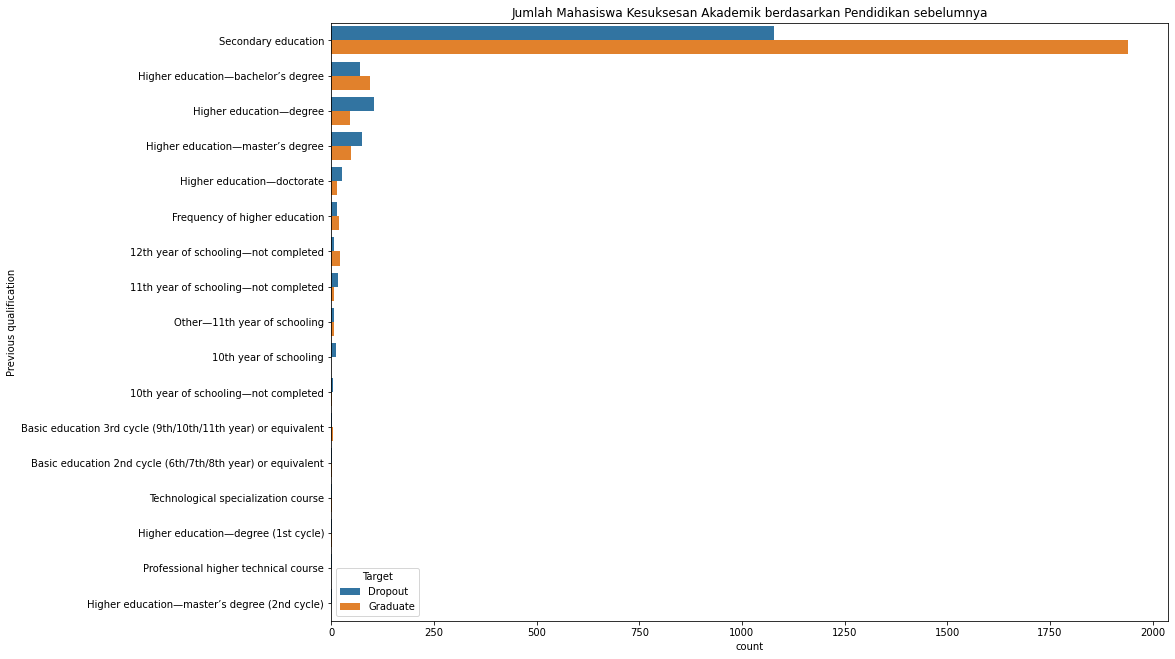

In [ ]:
plt.figure(figsize=(15,11))

sns.countplot(data=eda, y='Previous qualification', hue='Target', hue_order=['Dropout', 'Graduate'],order=eda['Previous qualification'].value_counts().index)
plt.yticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], labels=['Secondary education',
'Higher education—bachelor’s degree',
'Higher education—degree',
'Higher education—master’s degree',
'Higher education—doctorate',
'Frequency of higher education',
'12th year of schooling—not completed',
'11th year of schooling—not completed',
'Other—11th year of schooling',
'10th year of schooling',
'10th year of schooling—not completed',
'Basic education 3rd cycle (9th/10th/11th year) or equivalent',
'Basic education 2nd cycle (6th/7th/8th year) or equivalent',
'Technological specialization course','Higher education—degree (1st cycle)',
'Professional higher technical course',
'Higher education—master’s degree (2nd cycle)'])
plt.title('Jumlah Mahasiswa Kesuksesan Akademik berdasarkan Pendidikan sebelumnya')
plt.show()

### Analisis Akademik

In [ ]:
eda.replace("Dropout", 0, inplace=True)
eda.replace("Graduate", 1, inplace=True)

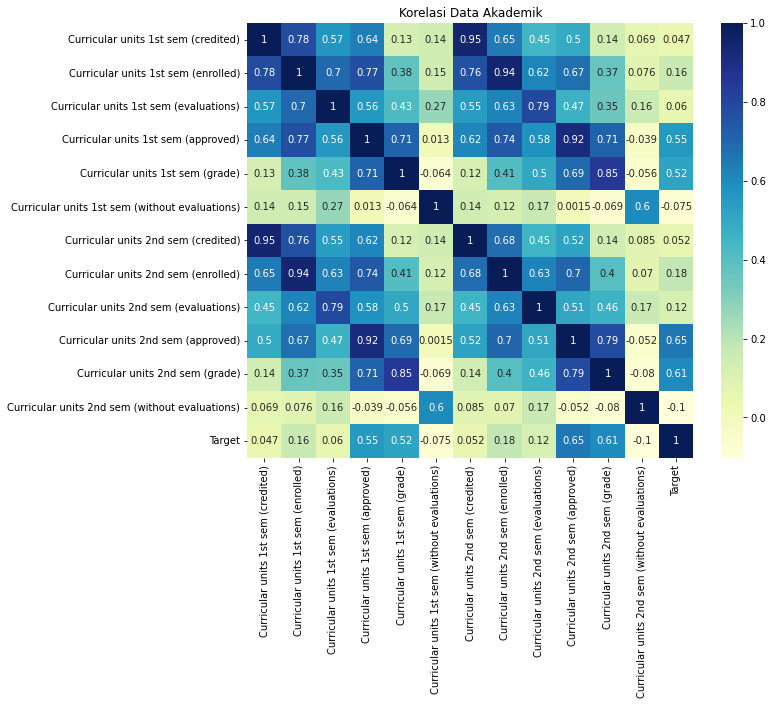

In [ ]:
ac_df = eda[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]
plt.figure(figsize = (10,8))   
sns.heatmap(ac_df.corr(), annot = True, cmap ='YlGnBu')
plt.title('Korelasi Data Akademik')
plt.show()

## Data Cleaning

### Transformasi Tipe Data yang dibutuhkan

Mengubah Target menjadi kategorikal dan drop "Enroll"

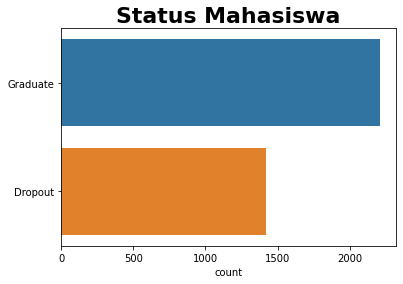

Graduate    60.85%
Dropout     39.15%
Name: Target, dtype: object


In [ ]:
students_df = data.copy()

students_df = students_df[students_df['Target']!='Enrolled']
count_plot(students_df, y="Target",title="Status Mahasiswa" )

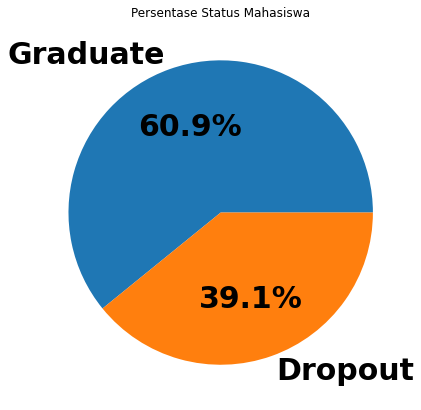

In [ ]:
pie_stats = students_df['Target'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(pie_stats, labels=pie_stats.index, autopct='%1.1f%%', textprops={'fontsize': 30, 'weight':'bold'})
plt.title('Persentase Status Mahasiswa')
plt.show()

Mengubah Dropout dan graduate menjadi 0 dan 1

In [ ]:
students_df.replace("Dropout", 0, inplace=True)
students_df.replace("Graduate", 1, inplace=True)
students_df

Marital status  Application mode  Application order  Course  \
0                  1                 8                  5       2   
1                  1                 6                  1      11   
2                  1                 1                  5       5   
3                  1                 8                  2      15   
4                  2                12                  1       3   
...              ...               ...                ...     ...   
4419               1                 1                  6      15   
4420               1                 1                  2      15   
4421               1                 1                  1      12   
4422               1                 1                  1       9   
4423               1                 5                  1      15   

      Daytime/evening attendance  Previous qualification  Nacionality  \
0                              1                       1            1   
1                              1                       1            1   
2                              1                       1            1   
3                              1                       1            1   
4                              0                       1            1   
...                          ...                     ...          ...   
4419                           1                       1            1   
4420                           1                       1           19   
4421                           1                       1            1   
4422                           1                       1            1   
4423                           1                       1            9   

      Mother's qualification  Father's qualification  Mother's occupation  \
0                         13                      10                    6   
1                          1                       3                    4   
2                         22                      27                   10   
3                         23                      27                    6   
4                         22                      28                   10   
...                      ...                     ...                  ...   
4419                       1                       1                    6   
4420                       1                       1                   10   
4421                      22                      27                   10   
4422                      22                      27                    8   
4423                      23                      27                    6   

      ...  Curricular units 2nd sem (credited)  \
0     ...                                    0   
1     ...                                    0   
2     ...                                    0   
3     ...                                    0   
4     ...                                    0   
...   ...                                  ...   
4419  ...                                    0   
4420  ...                                    0   
4421  ...                                    0   
4422  ...                                    0   
4423  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                                          0   
1                                          6   
2                                          0   
3                                        

In [ ]:
students_df.shape

(3630, 35)

### Dropping Columns

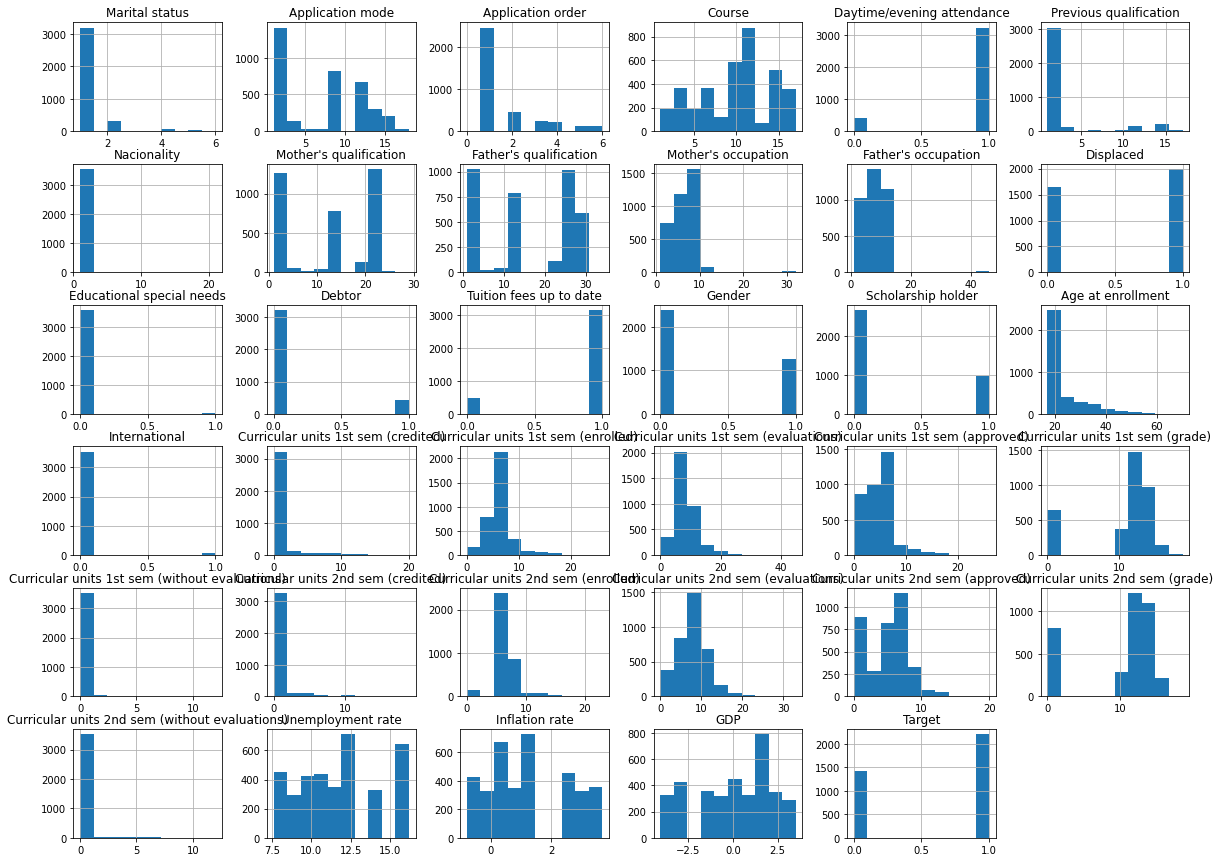

In [ ]:
students_df.hist(figsize=(20,15))
plt.show()

Melihat kesamaan antara Nacionality dan International

Text(0.5, 1.0, 'International')

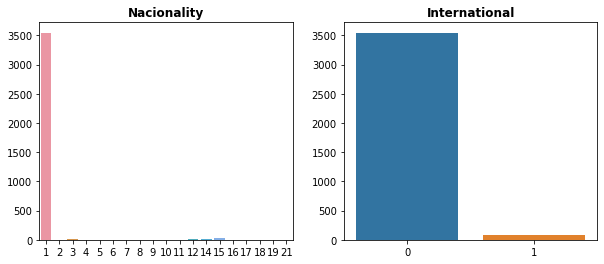

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,4))

sns.barplot(x=students_df['Nacionality'].unique(),y=students_df['Nacionality'].value_counts(),ax=ax[0]).set_ylabel('')
ax[0].set_title('Nacionality',weight='bold')  

sns.barplot(x=students_df['International'].unique(),y=students_df['International'].value_counts(),ax=ax[1]).set_ylabel('')
ax[1].set_title('International',weight='bold')

Grafik diatas menunjukkan bahwa data kewarganegaraan hanya didominasi oleh satu negara, Keduanya akan di drop karena kedua kolom sangat imbalance yang dapat menyebabkan ketimpangan

In [ ]:
students_df.loc[:, 'International'].value_counts()

0    3544
1      86
Name: International, dtype: int64

In [ ]:
dropped_columns = ['Nacionality','International']
students_df.drop(dropped_columns,axis = 1, inplace=True)
students_df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Mother's qualification  \
0                           1                       1                      13   
1                           1                       1                       1   
2                           1                       1                      22   
3                           1                       1                      23   
4                           0                       1                      22   

   Father's qualification  Mother's occupation  Father's occupation  ...  \
0                      10                    6                   10  ...   
1                       3                    4                    4  ...   
2                      27                   10                   10  ...   
3                      27                    6                    4  ...   
4                      28                   10                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  Target  
0             1.4  1.74       0  
1            -0.3  0.79       1  
2             1.4  1.74       0  
3            -0.8 -3.12       1  
4            -0.3  0.79       1  

[5 rows x 33 columns]

Melihat Kolom Educational Special Needs

Text(0.5, 1.0, 'Educational special needs')

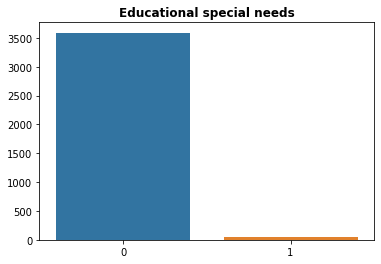

In [ ]:
sns.barplot(x=students_df['Educational special needs'].unique(),y=students_df['Educational special needs'].value_counts()).set_ylabel('')
plt.title('Educational special needs',weight='bold')  

Grafik diatas menunjukan ketidakseimbangan yang sangat signfikan sehingga akan di drop

In [ ]:
dropped_columns = ['Educational special needs']
students_df.drop(dropped_columns,axis = 1, inplace=True)
students_df.head()
students_df.shape

(3630, 32)

### Deteksi Outliers

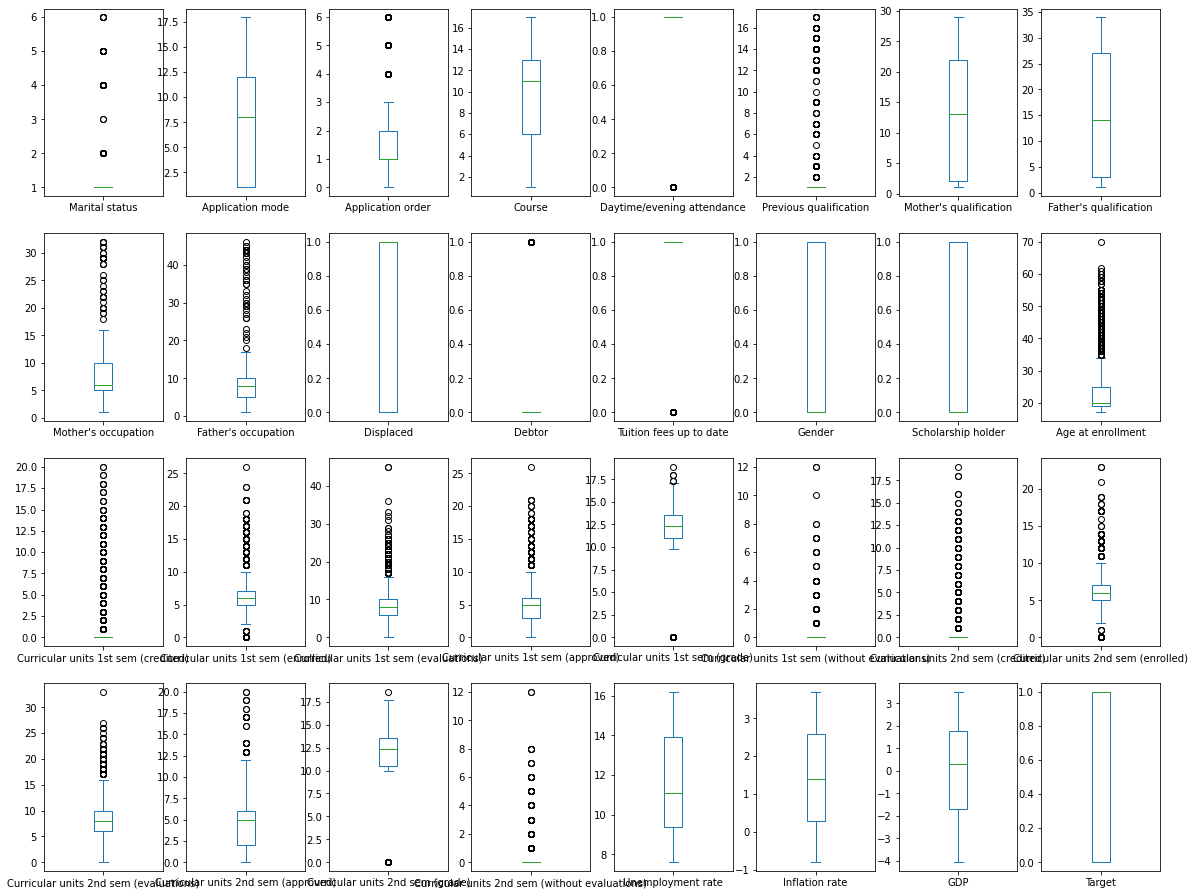

In [ ]:
students_df.plot(kind='box', figsize=(20,20), layout = (5,8), subplots = True, sharex = False, sharey = False)
plt.show()

Melihat potensi Outlier pada kolom data kontinu

In [ ]:
students_df.describe(include='float')

Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
count                       3630.000000                       3630.000000   
mean                          10.534860                         10.036155   
std                            5.057694                          5.481742   
min                            0.000000                          0.000000   
25%                           11.000000                         10.517857   
50%                           12.341429                         12.333333   
75%                           13.500000                         13.500000   
max                           18.875000                         18.571429   

       Unemployment rate  Inflation rate          GDP  
count        3630.000000     3630.000000  3630.000000  
mean           11.630358        1.231598    -0.009256  
std             2.667652        1.384911     2.259986  
min             7.600000       -0.800000    -4.060000  
25%             9.400000        0.300000    -1.700000  
50%            11.100000        1.400000     0.320000  
75%            13.900000        2.600000     1.790000  
max            16.200000        3.700000     3.510000

In [ ]:
students_df.loc[(students_df['Curricular units 1st sem (grade)'] == 0) & (students_df['Curricular units 1st sem (grade)'] == 0) &(students_df['Target'] == 1)]

Marital status  Application mode  Application order  Course  \
20                 1                 1                  3       2   
66                 1                 1                  3       2   
101                1                 1                  4       2   
405                1                 1                  1       2   
527                1                12                  1       2   
...              ...               ...                ...     ...   
3946               1                 8                  2       2   
4291               1                 1                  1       2   
4353               1                 1                  1       2   
4365               1                 1                  2       2   
4370               1                 1                  3       2   

      Daytime/evening attendance  Previous qualification  \
20                             1                       1   
66                             1                       1   
101                            1                       1   
405                            1                       1   
527                            1                       1   
...                          ...                     ...   
3946                           1                       1   
4291                           1                       1   
4353                           1                       1   
4365                           1                       1   
4370                           1                       1   

      Mother's qualification  Father's qualification  Mother's occupation  \
20                         1                       1                   10   
66                        13                      14                    6   
101                        1                       1                   10   
405                        1                      14                    4   
527                        3                       1                    3   
...                      ...                     ...                  ...   
3946                       3                       1                    3   
4291                       1                      28                    5   
4353                       3                       1                    5   
4365                      23                      28                    5   
4370                       1                       3                    6   

      Father's occupation  ...  Curricular units 2nd sem (credited)  \
20                      9  ...                                    0   
66                      4  ...                                    0   
101                    11  ...                                    0   
405                    10  ...                                    0   
527                    11  ...                                    0   
...                   ...  ...                                  ...   
3946                    7  ...                                    0   
4291                    6  ...                                    0   
4353                    5  ...                                    0   
4365                   10  ...                                    0   
4370                    3  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
20                                      0   
66                                      0   
101                                     0   
405                                     0   
527                                     0   
...                                   ...   
3946                                    0   
4291                                    0   
4353                                    0   
4365                                    0   
4370                                    0   

      Curricular units 2nd sem (evaluations)  \
20                                         0   
66                                       

In [ ]:
px.box(students_df, x=['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)','Unemployment rate','Inflation rate','GDP'])

#### Handling Outlier(Engga dipake kayaknya)

In [ ]:
def IQR(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  Minimum = Q1 - 1.5 * IQR
  Maximum = Q3 + 1.5 * IQR
  filter_lower = df[column] < Minimum
  filter_upper = df[column] > Maximum
  return filter_lower, filter_upper

In [ ]:
filterL, filterU = IQR(students_df, 'Curricular units 1st sem (grade)')

In [ ]:
filterL2, filterU2 = IQR(students_df, 'Curricular units 2nd sem (grade)')

In [ ]:
filterL3, filterU3 = IQR(students_df, 'Age at enrollment')

In [ ]:
df_outlier = students_df[filterL | filterU | filterL2 | filterU2 | filterL3 | filterU3]
df_clean = students_df[~(filterL | filterU | filterL3 | filterU3)]

In [ ]:
df_clean.shape

(2706, 32)

In [ ]:
px.box(df_outlier, x=['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Age at enrollment'], title = 'Outliers')

In [ ]:
px.box(df_clean, x=['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'], title = 'Setelah Cleaning')

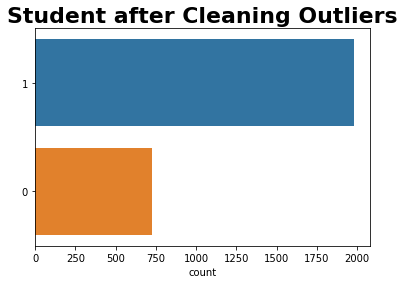

1    73.13%
0    26.87%
Name: Target, dtype: object


In [ ]:
count_plot(df_clean, y='Target', title ='Student after Cleaning Outliers')

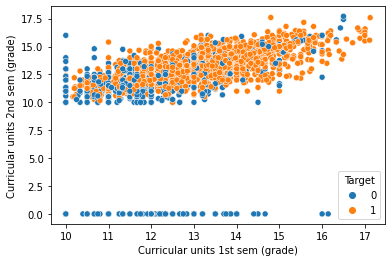

In [ ]:
sns.scatterplot(data=df_clean, x='Curricular units 1st sem (grade)', y='Curricular units 2nd sem (grade)', hue='Target')
plt.show()

Data menjadi imbalance, tidak jadi clean outliers karena mahasiswa dapat nilai 0 di 1 semester masih masuk akal 

In [ ]:
df_clean.loc[(df_clean['Curricular units 1st sem (grade)'] == 0) & (df_clean['Curricular units 1st sem (grade)'] == 0) &(['Target'] == 1)]

Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance, Previous qualification, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Displaced, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x 32 columns]

### Korelasi kolom pearson

In [ ]:
# Data Demografi
demographic_df = students_df[["Marital status", "Displaced", "Gender", "Age at enrollment", "Target"]]

# Data Sosio-Ekonomi
se_df = students_df[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

# Data Makro ekonomi
ma_df = students_df[['Unemployment rate', 'Inflation rate', 'GDP', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Target']]

# Data akademik
ac_df = students_df[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]


Correlation Matrix Data Demografi

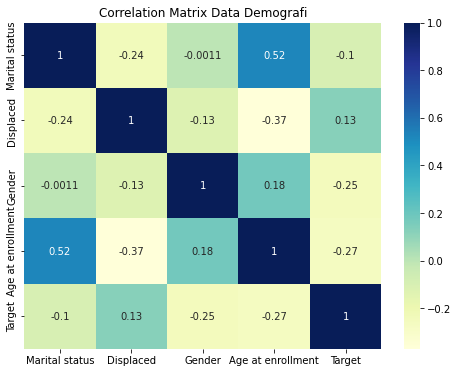

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(demographic_df.corr(),annot = True, cmap = "YlGnBu")
plt.title('Correlation Matrix Data Demografi')
plt.show()



*   Kolom Nacionality dan International memiliki korelasi yang sangat tinggi (0.92), berpotensi untuk dibuang salah satunya



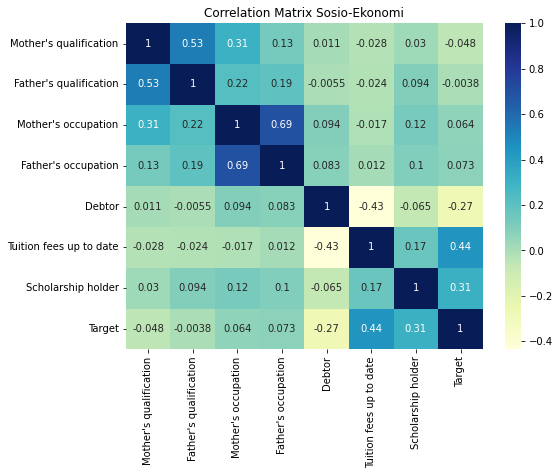

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(se_df.corr(),annot = True, cmap = "YlGnBu")
plt.title('Correlation Matrix Sosio-Ekonomi')
plt.show()



*   Mother's Occupation dan Father's Occupation memiliki korelasi yang cukup tinggi



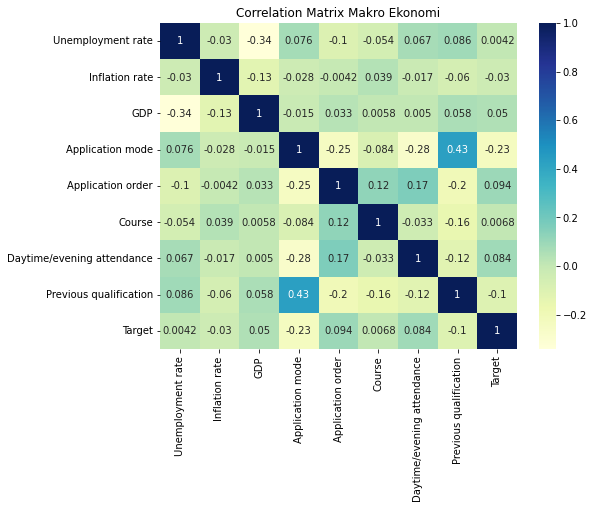

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(ma_df.corr(),annot = True, cmap = "YlGnBu")
plt.title('Correlation Matrix Makro Ekonomi')
plt.show()

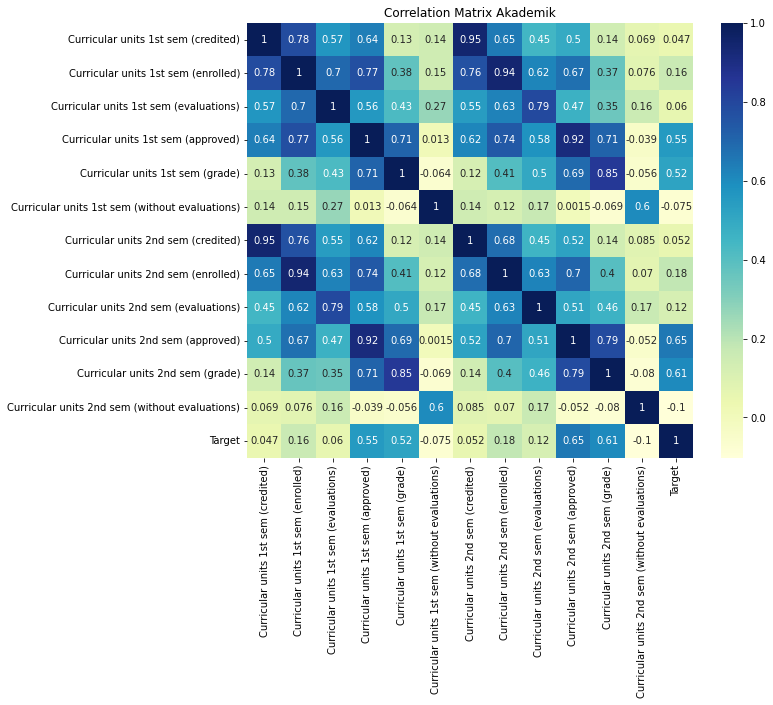

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(ac_df.corr(),annot = True, cmap = "YlGnBu")
plt.title('Correlation Matrix Akademik')
plt.show()

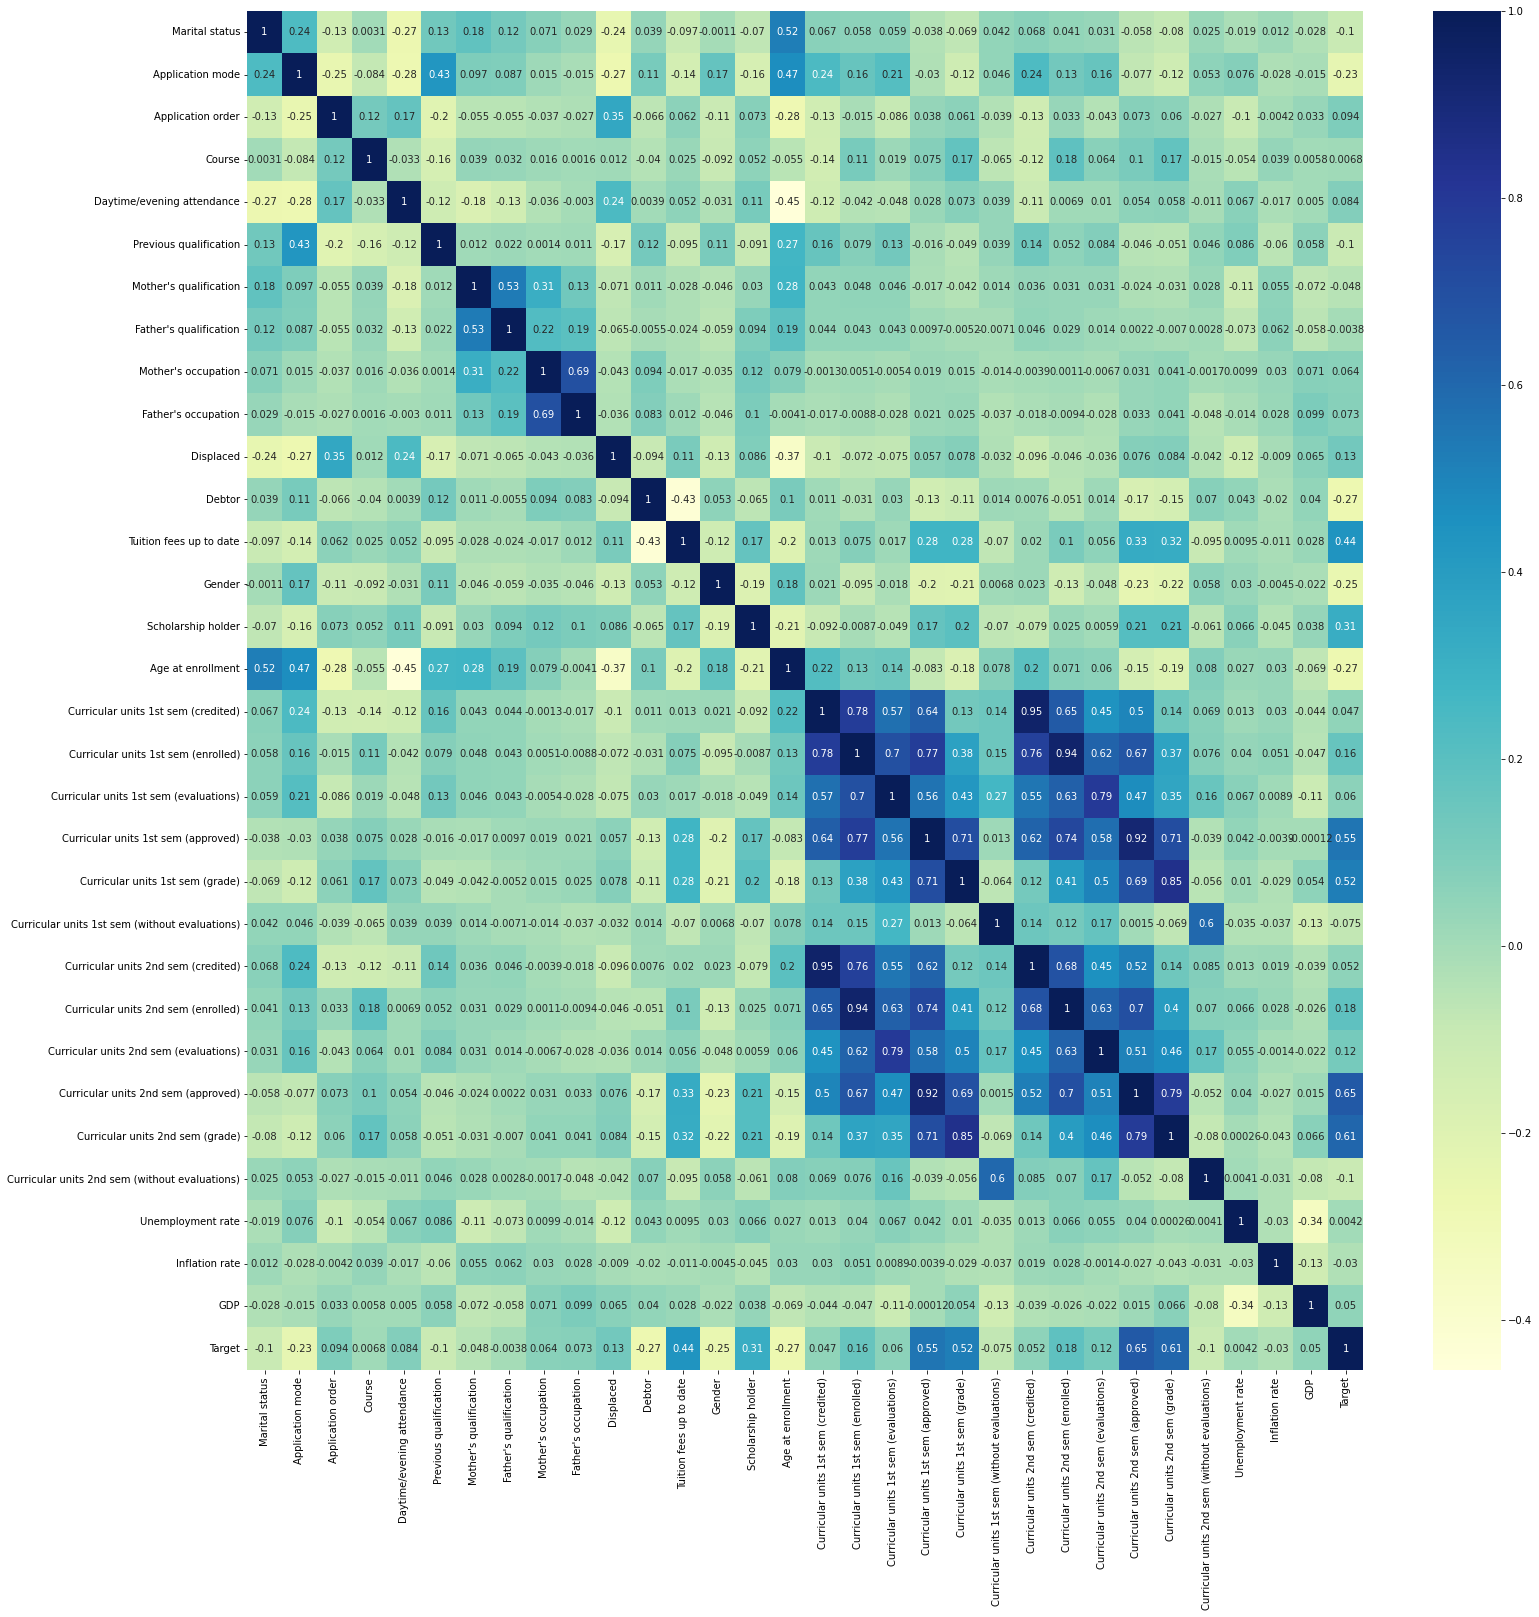

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(students_df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

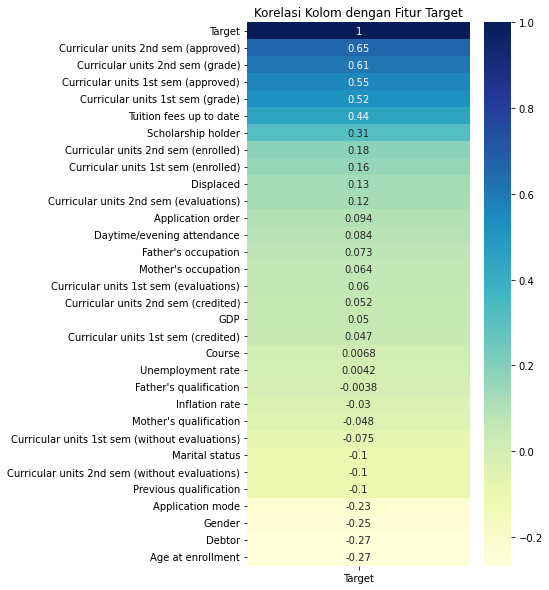

In [ ]:
plt.figure(figsize = (5,10))
sns.heatmap(students_df.corr()[['Target']].sort_values(by='Target', ascending=False), annot = True, cmap ='YlGnBu')
plt.title('Korelasi Kolom dengan Fitur Target')
plt.show()

### Korelasi kolom kategorikal

In [ ]:
#Kolom Numerikal
num_df = students_df[['Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)',
       'Unemployment rate',
       'Inflation rate',
       'GDP']]

cat_df = students_df.drop(num_df.columns, axis=1)

cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4423
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Marital status              3630 non-null   int64
 1   Application mode            3630 non-null   int64
 2   Application order           3630 non-null   int64
 3   Course                      3630 non-null   int64
 4   Daytime/evening attendance  3630 non-null   int64
 5   Previous qualification      3630 non-null   int64
 6   Mother's qualification      3630 non-null   int64
 7   Father's qualification      3630 non-null   int64
 8   Mother's occupation         3630 non-null   int64
 9   Father's occupation         3630 non-null   int64
 10  Displaced                   3630 non-null   int64
 11  Debtor                      3630 non-null   int64
 12  Tuition fees up to date     3630 non-null   int64
 13  Gender                      3630 non-null   int64
 14  Scholars

In [ ]:
resultant = pd.DataFrame(data=0, index=cat_df.columns, columns=cat_df.columns)

In [ ]:
# Loop through all pairs of categorical columns
for i in range(len(cat_df.columns)):
    for j in range(i+1, len(cat_df.columns)):
        # Create contingency table between the two columns
        contingency_table = pd.crosstab(cat_df.iloc[:, i], cat_df.iloc[:, j])
        
        # Calculate chi-square statistic and p-value
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Store p-value in the resultant matrix
        resultant.iloc[i, j] = p
        resultant.iloc[j, i] = p # mirror values across diagonal

# Fill diagonal with 1's (since p-value for same column will be 1)
np.fill_diagonal(resultant.values, 1)

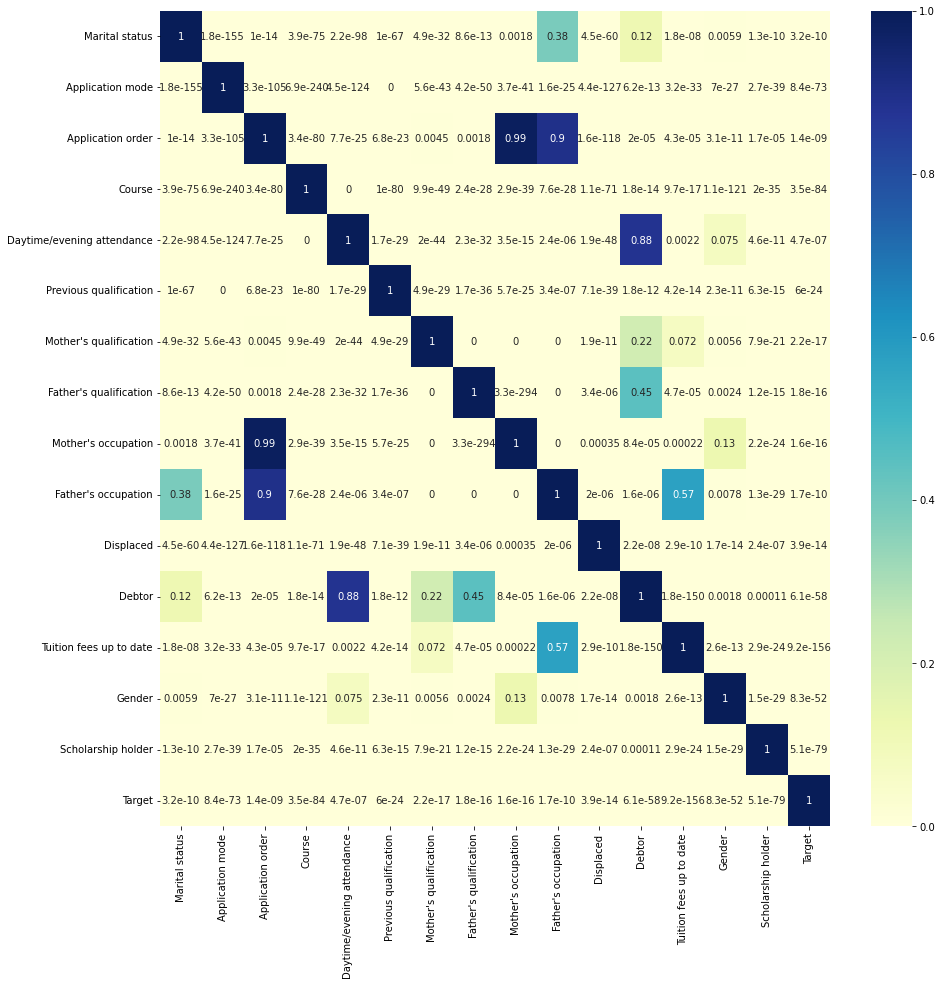

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(resultant, annot=True, cmap='YlGnBu')
plt.show()

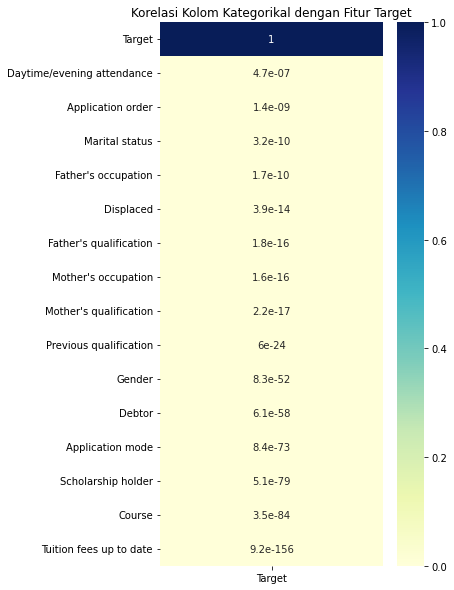

In [ ]:
plt.figure(figsize = (5,10))
sns.heatmap(resultant[['Target']].sort_values(by='Target', ascending=False), annot = True, cmap ='YlGnBu')
plt.title('Korelasi Kolom Kategorikal dengan Fitur Target')
plt.show()

# Modelling <br>
Memodelkan Machine Learning sebagai solusi permasalahan

Algoritma yang digunakan : 
1. Logistic Regression
2. Random Forest
3. Decision Tree


## Feature Engineering

Melihat fitur kategorikal yang sudah diubah menjadi numerikal (dari datasetnya)

In [ ]:
cat_df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Mother's qualification  \
0                           1                       1                      13   
1                           1                       1                       1   
2                           1                       1                      22   
3                           1                       1                      23   
4                           0                       1                      22   

   Father's qualification  Mother's occupation  Father's occupation  \
0                      10                    6                   10   
1                       3                    4                    4   
2                      27                   10                   10   
3                      27                    6                    4   
4                      28                   10                   10   

   Displaced  Debtor  Tuition fees up to date  Gender  Scholarship holder  \
0          1       0                        1       1                   0   
1          1       0                        0       1                   0   
2          1       0                        0       1                   0   
3          1       0                        1       0                   0   
4          0       0                        1       0                   0   

   Target  
0       0  
1       1  
2       0  
3       1  
4       1

Data kategorikal sudah diubah menjadi angka sehingga tidak perlu melakukan OneHot Encoding

Fitur Numerik

In [ ]:
num_df.head()

Age at enrollment  Curricular units 1st sem (credited)  \
0                 20                                    0   
1                 19                                    0   
2                 19                                    0   
3                 20                                    0   
4                 45                                    0   

   Curricular units 1st sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 1st sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                       8   
4                                       9   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                                    0                          0.000000   
1                                    6                         14.000000   
2                                    0                          0.000000   
3                                    6                         13.428571   
4                                    5                         12.333333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP  
0             1.4  1.74  
1            -0.3  0.79  
2             1.4  1.74  
3            -0.8 -3.12  
4            -0.3  0.79

### Standarisasi fitur numerik

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_data = ss.fit_transform(num_df)
standarized_data = pd.DataFrame(scaled_data, index = num_df.index, columns = num_df.columns)
print(standarized_data.shape)
standarized_data.head()

(3630, 16)


Age at enrollment  Curricular units 1st sem (credited)  \
0          -0.442212                            -0.304517   
1          -0.569976                            -0.304517   
2          -0.569976                            -0.304517   
3          -0.442212                            -0.304517   
4           2.751894                            -0.304517   

   Curricular units 1st sem (enrolled)  \
0                            -2.465538   
1                            -0.131288   
2                            -0.131288   
3                            -0.131288   
4                            -0.131288   

   Curricular units 1st sem (evaluations)  \
0                               -1.883107   
1                               -0.483214   
2                               -1.883107   
3                               -0.016583   
4                                0.216733   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                            -1.480034                         -2.083224   
1                             0.373306                          0.685217   
2                            -1.480034                         -2.083224   
3                             0.373306                          0.572219   
4                             0.064416                          0.355641   

   Curricular units 1st sem (without evaluations)  \
0                                       -0.189871   
1                                       -0.189871   
2                                       -0.189871   
3                                       -0.189871   
4                                       -0.189871   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                            -0.287686                            -2.782691   
1                            -0.287686                            -0.131002   
2                            -0.287686                            -0.131002   
3                            -0.287686                            -0.131002   
4                            -0.287686                            -0.131002   

   Curricular units 2nd sem (evaluations)  \
0                               -1.958586   
1                               -0.444817   
2                               -1.958586   
3                                0.564362   
4                               -0.444817   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                            -1.429014                         -1.831085   
1                             0.468555                          0.662383   
2                            -1.429014                         -1.831085   
3                             0.152293                          0.431281   
4                             0.468555                          0.540750   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                       -0.190148          -0.311312   
1                                       -0.190148           0.850919   
2                                       -0.190148          -0.311312   
3                                       -0.190148          -0.836191   
4                                       -0.190148           0.850919   

   Inflation rate       GDP  
0        0.121615  0.774119  
1       -1.106070  0.353704  
2        0.121615  0.774119  
3       -1.467154 -1.376634  
4       -1.106070  0.353704

### Penyatuan dataframe

In [ ]:
fe_df = pd.concat([standarized_data.reset_index(drop=True), cat_df.reset_index(drop=True)],axis=1)
print(fe_df.shape)
fe_df.head()

(3630, 32)


Age at enrollment  Curricular units 1st sem (credited)  \
0          -0.442212                            -0.304517   
1          -0.569976                            -0.304517   
2          -0.569976                            -0.304517   
3          -0.442212                            -0.304517   
4           2.751894                            -0.304517   

   Curricular units 1st sem (enrolled)  \
0                            -2.465538   
1                            -0.131288   
2                            -0.131288   
3                            -0.131288   
4                            -0.131288   

   Curricular units 1st sem (evaluations)  \
0                               -1.883107   
1                               -0.483214   
2                               -1.883107   
3                               -0.016583   
4                                0.216733   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                            -1.480034                         -2.083224   
1                             0.373306                          0.685217   
2                            -1.480034                         -2.083224   
3                             0.373306                          0.572219   
4                             0.064416                          0.355641   

   Curricular units 1st sem (without evaluations)  \
0                                       -0.189871   
1                                       -0.189871   
2                                       -0.189871   
3                                       -0.189871   
4                                       -0.189871   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                            -0.287686                            -2.782691   
1                            -0.287686                            -0.131002   
2                            -0.287686                            -0.131002   
3                            -0.287686                            -0.131002   
4                            -0.287686                            -0.131002   

   Curricular units 2nd sem (evaluations)  ...  Mother's qualification  \
0                               -1.958586  ...                      13   
1                               -0.444817  ...                       1   
2                               -1.958586  ...                      22   
3                                0.564362  ...                      23   
4                               -0.444817  ...                      22   

   Father's qualification  Mother's occupation  Father's occupation  \
0                      10                    6                   10   
1                       3                    4                    4   
2                      27                   10                   10   
3                      27                    6                    4   
4                      28                   10                   10   

   Displaced  Debtor  Tuition fees up to date  Gender  Scholarship holder  \
0          1       0                        1       1                   0   
1          1       0                        0       1                   0   
2          1       0                        0       1                   0   
3          1       0                        1       0                   0   
4          0       0                        1       0                   0   

   Target  
0       0  
1       1  
2       0  
3       1  
4       1  

[5 rows x 32 columns]

In [ ]:
fe_df.isna().sum()

Age at enrollment                                 0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (enrolled)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course      

## Machine Learning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X = fe_df.drop('Target',axis=1)
y= fe_df['Target']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=8)

### Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100,2)
acc_log

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



91.84

In [ ]:
print(logreg.score(X_train,Y_train))
print(logreg.score(X_test,Y_test))

0.9183884297520661
0.9008264462809917


In [ ]:
matrix = confusion_matrix(pred, Y_test)

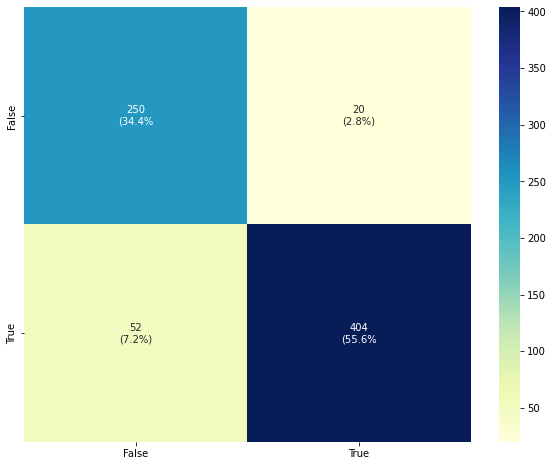

In [ ]:
plt.figure(figsize=(10,8))

percentages = (matrix / np.sum(matrix)) * 100
percentages = np.round(percentages, decimals=1)

annotations = np.empty((matrix.shape[0], matrix.shape[1]), dtype='U10')
for i in range(len(matrix)):
    for j in range(len(matrix)):
        annotations[i, j] = '{}\n({:.1f}%)'.format(matrix[i, j], percentages[i, j])

conf_matrix = sns.heatmap(matrix, annot = annotations, fmt='', cmap ='YlGnBu')
conf_matrix.xaxis.set_ticklabels(['False','True'])
conf_matrix.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       270
           1       0.95      0.89      0.92       456

    accuracy                           0.90       726
   macro avg       0.89      0.91      0.90       726
weighted avg       0.91      0.90      0.90       726



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = logreg.predict_proba(X_test)[:,1]

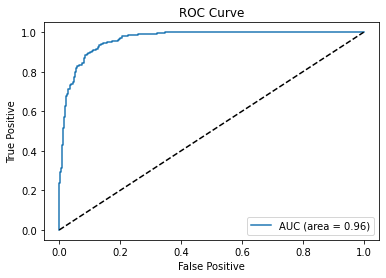

In [ ]:
fpr, tpr, treshold = roc_curve(Y_test,y_pred_prob)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show()

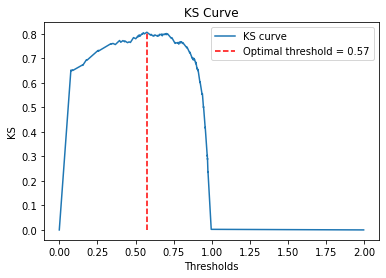

In [ ]:
ks = tpr - fpr

# Temukan nilai threshold yang memberikan nilai KS maksimum
optimal_threshold = treshold[np.argmax(ks)]

# Plotting nilai KS pada setiap threshold
plt.plot(treshold, ks, label='KS curve')
plt.plot([optimal_threshold, optimal_threshold], [0, np.max(ks)], 'r--', label='Optimal threshold = %0.2f' % optimal_threshold)
plt.xlabel('Thresholds')
plt.ylabel('KS')
plt.title('KS Curve')
plt.legend()
plt.show()

10 Fitur terpenting Logistic Regression

In [ ]:
feature_importance = pd.DataFrame(logreg.coef_[0])
feature_importance['label'] = X_train.columns
feature_importance.sort_values(by=0,ascending=False).head(10).reset_index(drop=True)

0                                           label
0  2.903075             Curricular units 2nd sem (approved)
1  2.001040                         Tuition fees up to date
2  1.957878             Curricular units 1st sem (approved)
3  0.663235                              Scholarship holder
4  0.389450                Curricular units 2nd sem (grade)
5  0.112774  Curricular units 1st sem (without evaluations)
6  0.110691  Curricular units 2nd sem (without evaluations)
7  0.060761                                  Marital status
8  0.049708                             Mother's occupation
9  0.027527                          Previous qualification

### Decision Tree Clasifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
print(dtree.score(X_train,Y_train))
print(dtree.score(X_test,Y_test))

1.0
0.8526170798898072


In [ ]:
pred = dtree.predict(X_test)
acc_log = round(dtree.score(X_train, Y_train)*100,2)
acc_log

100.0

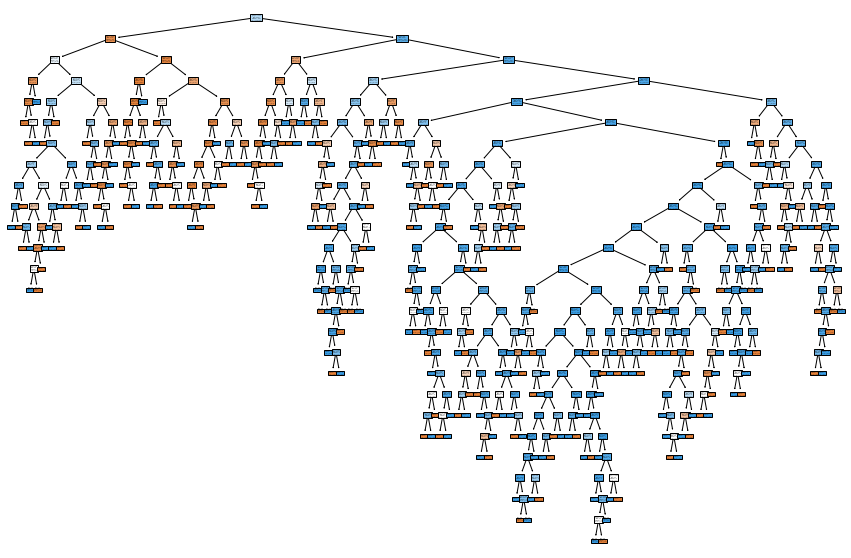

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(DecisionTreeClassifier().fit(X_train,Y_train), filled=True)
plt.show()

In [ ]:
matrix = confusion_matrix(pred, Y_test)

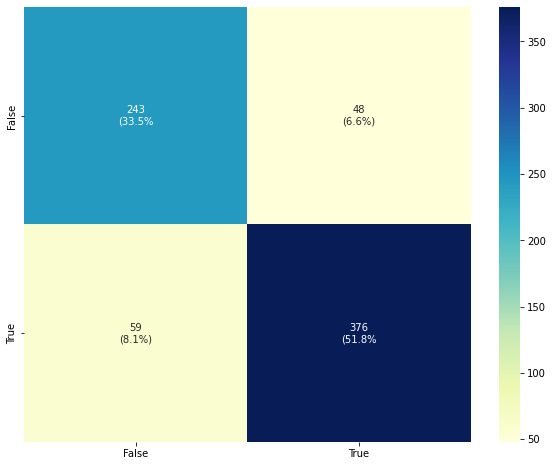

In [ ]:
plt.figure(figsize=(10,8))

percentages = (matrix / np.sum(matrix)) * 100
percentages = np.round(percentages, decimals=1)

annotations = np.empty((matrix.shape[0], matrix.shape[1]), dtype='U10')
for i in range(len(matrix)):
    for j in range(len(matrix)):
        annotations[i, j] = '{}\n({:.1f}%)'.format(matrix[i, j], percentages[i, j])

conf_matrix = sns.heatmap(matrix, annot = annotations, fmt='', cmap ='YlGnBu')
conf_matrix.xaxis.set_ticklabels(['False','True'])
conf_matrix.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
print(confusion_matrix(pred,Y_test))
print(classification_report(pred,Y_test))

[[243  48]
 [ 59 376]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       291
           1       0.89      0.86      0.88       435

    accuracy                           0.85       726
   macro avg       0.85      0.85      0.85       726
weighted avg       0.85      0.85      0.85       726



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = dtree.predict_proba(X_test)[:,1]

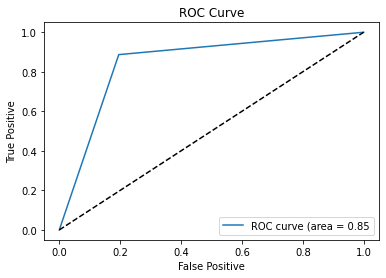

In [ ]:
fpr, tpr, treshold = roc_curve(Y_test,y_pred_prob)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

plt.plot(fpr,tpr, label='ROC curve (area = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show()

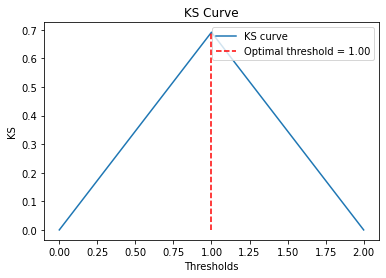

In [ ]:
ks = tpr - fpr

# Temukan nilai threshold yang memberikan nilai KS maksimum
optimal_threshold = treshold[np.argmax(ks)]

# Plotting nilai KS pada setiap threshold
plt.plot(treshold, ks, label='KS curve')
plt.plot([optimal_threshold, optimal_threshold], [0, np.max(ks)], 'r--', label='Optimal threshold = %0.2f' % optimal_threshold)
plt.xlabel('Thresholds')
plt.ylabel('KS')
plt.title('KS Curve')
plt.legend()
plt.show()

10 Fitur terpenting decision tree

In [ ]:
feature_importance = pd.DataFrame(dtree.feature_importances_)
feature_importance['label'] = X_train.columns
feature_importance.sort_values(by=0,ascending=False).head(10).reset_index(drop=True)

0                                   label
0  0.558734     Curricular units 2nd sem (approved)
1  0.065488                 Tuition fees up to date
2  0.037997     Curricular units 2nd sem (enrolled)
3  0.034652        Curricular units 2nd sem (grade)
4  0.025650                       Age at enrollment
5  0.024547                                  Course
6  0.024536        Curricular units 1st sem (grade)
7  0.023535                       Unemployment rate
8  0.020571  Curricular units 1st sem (evaluations)
9  0.019404                                     GDP

### Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
print(rfc.score(X_train,Y_train))
print(rfc.score(X_test,Y_test))

1.0
0.8925619834710744


In [ ]:
rfc.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1589622473),
 DecisionTreeClassifier(max_features='sqrt', random_state=830338370),
 DecisionTreeClassifier(max_features='sqrt', random_state=2026792924),
 DecisionTreeClassifier(max_features='sqrt', random_state=1507147884),
 DecisionTreeClassifier(max_features='sqrt', random_state=1802948734),
 DecisionTreeClassifier(max_features='sqrt', random_state=201315450),
 DecisionTreeClassifier(max_features='sqrt', random_state=703578330),
 DecisionTreeClassifier(max_features='sqrt', random_state=175327029),
 DecisionTreeClassifier(max_features='sqrt', random_state=1705542095),
 DecisionTreeClassifier(max_features='sqrt', random_state=2108284005),
 DecisionTreeClassifier(max_features='sqrt', random_state=167367370),
 DecisionTreeClassifier(max_features='sqrt', random_state=1833674383),
 DecisionTreeClassifier(max_features='sqrt', random_state=1563830772),
 DecisionTreeClassifier(max_features='sqrt', random_state=503873170),
 DecisionTre

In [ ]:
len(rfc.estimators_)

100

In [ ]:
pred = rfc.predict(X_test)
acc_log = round(rfc.score(X_train, Y_train)*100,2)
acc_log

100.0

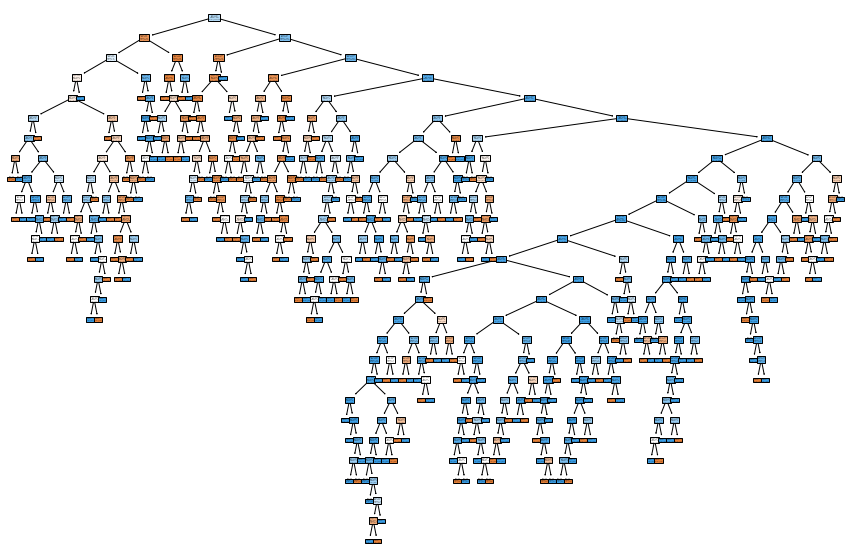

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(rfc.estimators_[2],filled =True)
plt.show()

In [ ]:
matrix = confusion_matrix(pred, Y_test)

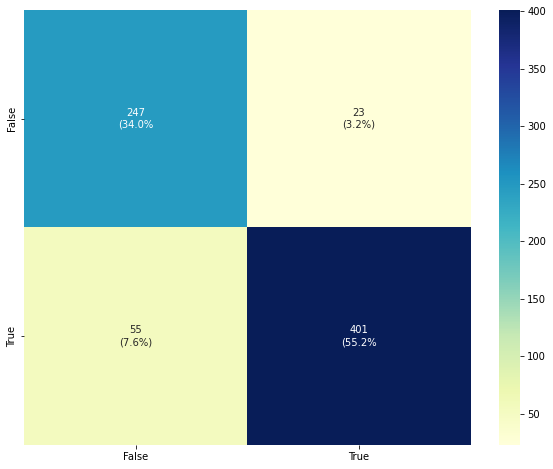

In [ ]:
plt.figure(figsize=(10,8))

percentages = (matrix / np.sum(matrix)) * 100
percentages = np.round(percentages, decimals=1)

annotations = np.empty((matrix.shape[0], matrix.shape[1]), dtype='U10')
for i in range(len(matrix)):
    for j in range(len(matrix)):
        annotations[i, j] = '{}\n({:.1f}%)'.format(matrix[i, j], percentages[i, j])

conf_matrix = sns.heatmap(matrix, annot = annotations, fmt='', cmap ='YlGnBu')
conf_matrix.xaxis.set_ticklabels(['False','True'])
conf_matrix.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
print(confusion_matrix(pred, Y_test))
print(classification_report(pred,Y_test))

[[247  23]
 [ 55 401]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       270
           1       0.95      0.88      0.91       456

    accuracy                           0.89       726
   macro avg       0.88      0.90      0.89       726
weighted avg       0.90      0.89      0.89       726



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = rfc.predict_proba(X_test)[:,1]

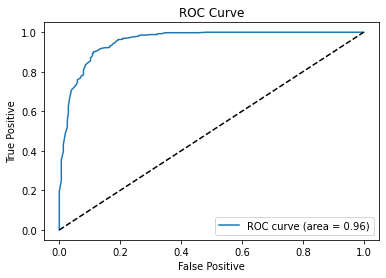

In [ ]:
fpr, tpr, treshold = roc_curve(Y_test,y_pred_prob)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show()

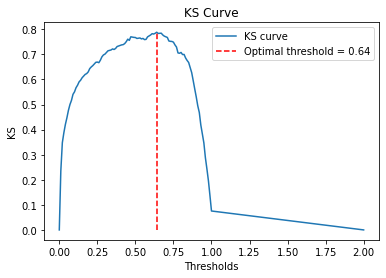

In [ ]:
ks = tpr - fpr

# Temukan nilai threshold yang memberikan nilai KS maksimum
optimal_threshold = treshold[np.argmax(ks)]

# Plotting nilai KS pada setiap threshold
plt.plot(treshold, ks, label='KS curve')
plt.plot([optimal_threshold, optimal_threshold], [0, np.max(ks)], 'r--', label='Optimal threshold = %0.2f' % optimal_threshold)
plt.xlabel('Thresholds')
plt.ylabel('KS')
plt.title('KS Curve')
plt.legend()
plt.show()

10 Fitur terpenting random forest

In [ ]:
feature_importance = pd.DataFrame(rfc.feature_importances_)
feature_importance['label'] = X_train.columns
feature_importance.sort_values(by=0,ascending=False).head(10).reset_index(drop=True)

0                                   label
0  0.231696     Curricular units 2nd sem (approved)
1  0.147401        Curricular units 2nd sem (grade)
2  0.110988     Curricular units 1st sem (approved)
3  0.079104        Curricular units 1st sem (grade)
4  0.057105                 Tuition fees up to date
5  0.031909                       Age at enrollment
6  0.028780  Curricular units 2nd sem (evaluations)
7  0.028445  Curricular units 1st sem (evaluations)
8  0.027631                                  Course
9  0.022595     Curricular units 1st sem (enrolled)

### Hyperparameter Tuning

In [ ]:
pipe = Pipeline([('clf',DecisionTreeClassifier())])

In [ ]:
search = [{'clf': [DecisionTreeClassifier()],
                    'clf__max_features':[8,9,10],'clf__max_depth':[5,10,15]},
                {'clf':[RandomForestClassifier()],
                    'clf__max_depth':[10,11,12,13,14,15],'clf__max_features':[8,9,10],'clf__n_estimators':[100,150,200], 'clf__min_samples_split':[2,3,4], 'clf__max_leaf_nodes':[2,3,5]},
                {'clf': [LogisticRegression()],
                 'clf__penalty': ['l1', 'l2'],
                 'clf__C': [0.01, 0.1, 1, 10, 100],
                 'clf__solver': ['liblinear','lbfgs']}]

Liblinear merupakan solver yang efisien dan cepat, sehingga lebih cocok digunakan pada dataset yang relatif kecil atau dengan jumlah sampel yang sedikit. Selain itu, liblinear juga dapat digunakan untuk memproses data yang memiliki banyak fitur.

Keuntungan lain dari liblinear adalah kemampuannya untuk menangani masalah kelas tidak seimbang atau imbalance class pada dataset dengan baik. Hal ini karena liblinear memungkinkan untuk menyesuaikan parameter yang dikenakan pada kelas minoritas dalam data untuk meminimalkan kesalahan prediksi pada kelas minoritas tersebut.

In [ ]:
cross_val = StratifiedKFold(n_splits = 5)
gs = GridSearchCV(pipe,search,cv=cross_val,return_train_score=True, verbose=3, scoring ='f1_micro')

In [ ]:
scores = cross_val_score(dtree, X_train, Y_train, cv = cross_val)
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Decision Tree Accuracy: 0.85 (+/- 0.01)


In [ ]:
scores = cross_val_score(rfc, X_train, Y_train, cv = cross_val)
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Random Forest Accuracy: 0.91 (+/- 0.01)


In [ ]:
scores = cross_val_score(logreg, X_train, Y_train, cv = cross_val)
print("Logistic RegressionAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Logistic RegressionAccuracy: 0.92 (+/- 0.01)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

In [ ]:
gs.fit(X_train, Y_train)

Fitting 5 folds for each of 515 candidates, totalling 2575 fits
[CV 1/5] END clf=DecisionTreeClassifier(), clf__max_depth=5, clf__max_features=8;, score=(train=0.885, test=0.847) total time=   0.0s
[CV 2/5] END clf=DecisionTreeClassifier(), clf__max_depth=5, clf__max_features=8;, score=(train=0.893, test=0.857) total time=   0.0s
[CV 3/5] END clf=DecisionTreeClassifier(), clf__max_depth=5, clf__max_features=8;, score=(train=0.903, test=0.892) total time=   0.0s
[CV 4/5] END clf=DecisionTreeClassifier(), clf__max_depth=5, clf__max_features=8;, score=(train=0.894, test=0.869) total time=   0.0s
[CV 5/5] END clf=DecisionTreeClassifier(), clf__max_depth=5, clf__max_features=8;, score=(train=0.889, test=0.866) total time=   0.0s
[CV 1/5] END clf=DecisionTreeClassifier(), clf__max_depth=5, clf__max_features=9;, score=(train=0.904, test=0.888) total time=   0.0s
[CV 2/5] END clf=DecisionTreeClassifier(), clf__max_depth=5, clf__max_features=9;, score=(train=0.904, test=0.895) total time=   0.0

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

[CV 4/5] END clf=LogisticRegression(), clf__C=0.01, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.898, test=0.898) total time=   0.1s
[CV 5/5] END clf=LogisticRegression(), clf__C=0.01, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.898, test=0.883) total time=   0.1s
[CV 1/5] END clf=LogisticRegression(), clf__C=0.1, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.920, test=0.912) total time=   0.0s
[CV 2/5] END clf=LogisticRegression(), clf__C=0.1, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.919, test=0.905) total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 3/5] END clf=LogisticRegression(), clf__C=0.1, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.917, test=0.924) total time=   0.0s
[CV 4/5] END clf=LogisticRegression(), clf__C=0.1, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.920, test=0.921) total time=   0.0s
[CV 5/5] END clf=LogisticRegression(), clf__C=0.1, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.916, test=0.912) total time=   0.1s
[CV 1/5] END clf=LogisticRegression(), clf__C=0.1, clf__penalty=l1, clf__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END clf=LogisticRegression(), clf__C=0.1, clf__penalty=l1, clf__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END clf=LogisticRegression(), clf__C=0.1, clf__penalty=l1, clf__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END clf=LogisticRegression(), clf__C=0.1, clf__penalty=l1, clf__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END clf=LogisticRegres

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

[CV 1/5] END clf=LogisticRegression(), clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.915, test=0.910) total time=   0.1s
[CV 2/5] END clf=LogisticRegression(), clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.920, test=0.907) total time=   0.1s
[CV 3/5] END clf=LogisticRegression(), clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.914, test=0.919) total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 4/5] END clf=LogisticRegression(), clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.916, test=0.919) total time=   0.1s
[CV 5/5] END clf=LogisticRegression(), clf__C=0.1, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.914, test=0.910) total time=   0.1s
[CV 1/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.921, test=0.909) total time=   0.1s
[CV 2/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.919, test=0.910) total time=   0.1s
[CV 3/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.917, test=0.919) total time=   0.1s
[CV 4/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.923, test=0.914) total time=   0.1s
[CV 5/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.920, test=0.917) total time=   0.1s
[CV 1/5] END clf=

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

[CV 2/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.920, test=0.910) total time=   0.1s
[CV 3/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.919, test=0.923) total time=   0.1s
[CV 4/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.921, test=0.917) total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 5/5] END clf=LogisticRegression(), clf__C=1, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.919, test=0.917) total time=   0.1s
[CV 1/5] END clf=LogisticRegression(), clf__C=10, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.921, test=0.907) total time=   0.1s
[CV 2/5] END clf=LogisticRegression(), clf__C=10, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.917, test=0.912) total time=   0.1s
[CV 3/5] END clf=LogisticRegression(), clf__C=10, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.917, test=0.919) total time=   0.1s
[CV 4/5] END clf=LogisticRegression(), clf__C=10, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.921, test=0.916) total time=   0.1s
[CV 5/5] END clf=LogisticRegression(), clf__C=10, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.919, test=0.916) total time=   0.1s
[CV 1/5] END clf=LogisticRegression(), clf__C=10, clf__penalty=l1, clf__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END clf=Lo

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

[CV 4/5] END clf=LogisticRegression(), clf__C=10, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.921, test=0.921) total time=   0.1s
[CV 5/5] END clf=LogisticRegression(), clf__C=10, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.920, test=0.919) total time=   0.1s
[CV 1/5] END clf=LogisticRegression(), clf__C=100, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.921, test=0.909) total time=   0.0s
[CV 2/5] END clf=LogisticRegression(), clf__C=100, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.917, test=0.912) total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[CV 3/5] END clf=LogisticRegression(), clf__C=100, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.917, test=0.917) total time=   0.1s
[CV 4/5] END clf=LogisticRegression(), clf__C=100, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.921, test=0.914) total time=   0.1s
[CV 5/5] END clf=LogisticRegression(), clf__C=100, clf__penalty=l1, clf__solver=liblinear;, score=(train=0.919, test=0.914) total time=   0.1s
[CV 1/5] END clf=LogisticRegression(), clf__C=100, clf__penalty=l1, clf__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END clf=LogisticRegression(), clf__C=100, clf__penalty=l1, clf__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END clf=LogisticRegression(), clf__C=100, clf__penalty=l1, clf__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END clf=LogisticRegression(), clf__C=100, clf__penalty=l1, clf__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END clf=LogisticRegres

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

[CV 2/5] END clf=LogisticRegression(), clf__C=100, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.919, test=0.910) total time=   0.1s
[CV 3/5] END clf=LogisticRegression(), clf__C=100, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.918, test=0.916) total time=   0.0s
[CV 4/5] END clf=LogisticRegression(), clf__C=100, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.920, test=0.921) total time=   0.0s
[CV 5/5] END clf=LogisticRegression(), clf__C=100, clf__penalty=l2, clf__solver=lbfgs;, score=(train=0.920, test=0.917) total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning:

One or more of the test scores are non-finite: [0.86604665 0.88291531 0.88533207 0.875338   0.87844264 0.87775239
 0.86260253 0.8539949  0.85742952 0.86260134 0.8663891  0.86535759
 0.8632904  0.86707757 0.86432192 0.86569826 0.86432192 0.86501217
 0.873967   0.8749997  0.87327794 0.87362277 0.87465666 0.87568817
 0.87259066 0.87637664 0.8750003  0.88292065 0.88154252 0.88085465
 0.88498546 0.88257582 0.88292124 0.8805116  0.88188676 0.88223218
 0.86363464 0.86501039 0.86742299 0.86466793 0.86501157 0.86570064
 0.86707935 0.86604428 0.86570182 0.87637664 0.87431302 0.8729343
 0.87465547 0.873967   0.87637723 0.87534572 0.87224642 0.87431183
 0.88188676 0.88257523 0.88085406 0.88188676 0.88257879 0.88223159
 0.88119829 0.88085406 0.88223277 0.86776782 0.86604546 0.86742299
 0.86535699 0.86845688 0.86742299 0.86604368 0.86707757 0.86604546
 0.87431183 0.87534512 0.87603241 0.87569114 0.87534394 0

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('clf', DecisionTreeClassifier())]),
             param_grid=[{'clf': [DecisionTreeClassifier()],
                          'clf__max_depth': [5, 10, 15],
                          'clf__max_features': [8, 9, 10]},
                         {'clf': [RandomForestClassifier()],
                          'clf__max_depth': [10, 11, 12, 13, 14, 15],
                          'clf__max_features': [8, 9, 10],
                          'clf__max_leaf_nodes': [2, 3, 5],
                          'clf__min_samples_split': [2, 3, 4],
                          'clf__n_estimators': [100, 150, 200]},
                         {'clf': [LogisticRegression(C=1, solver='liblinear')],
                          'clf__C': [0.01, 0.1, 1, 10, 100],
                          'clf__penalty': ['l1', 'l2'],
                          'clf__solver': ['liblinear', 'lbfgs']}],
             return_train_score=True, scoring='f1_micro', verbose=3)

In [ ]:
results = pd.DataFrame(gs.cv_results_)
results = results[['param_clf','params','mean_test_score','mean_train_score']].sort_values('mean_test_score',ascending=False)
results.head(50)

param_clf  \
506  LogisticRegression(C=1, solver='liblinear')   
505  LogisticRegression(C=1, solver='liblinear')   
510  LogisticRegression(C=1, solver='liblinear')   
514  LogisticRegression(C=1, solver='liblinear')   
499  LogisticRegression(C=1, solver='liblinear')   
509  LogisticRegression(C=1, solver='liblinear')   
503  LogisticRegression(C=1, solver='liblinear')   
507  LogisticRegression(C=1, solver='liblinear')   
513  LogisticRegression(C=1, solver='liblinear')   
511  LogisticRegression(C=1, solver='liblinear')   
501  LogisticRegression(C=1, solver='liblinear')   
502  LogisticRegression(C=1, solver='liblinear')   
497  LogisticRegression(C=1, solver='liblinear')   
498  LogisticRegression(C=1, solver='liblinear')   
248                     RandomForestClassifier()   
330                     RandomForestClassifier()   
243                     RandomForestClassifier()   
143                     RandomForestClassifier()   
166                     RandomForestClassifier()   
407                     RandomForestClassifier()   
406                     RandomForestClassifier()   
2                       DecisionTreeClassifier()   
409                     RandomForestClassifier()   
89                      RandomForestClassifier()   
332                     RandomForestClassifier()   
325                     RandomForestClassifier()   
247                     RandomForestClassifier()   
168                     RandomForestClassifier()   
413                     RandomForestClassifier()   
216                     RandomForestClassifier()   
246                     RandomForestClassifier()   
165                     RandomForestClassifier()   
30                      RandomForestClassifier()   
327                     RandomForestClassifier()   
163                     RandomForestClassifier()   
169                     RandomForestClassifier()   
251                     RandomForestClassifier()   
170                     RandomForestClassifier()   
329                     RandomForestClassifier()   
245                     RandomForestClassifier()   
81                      RandomForestClassifier()   
460                     RandomForestClassifier()   
82                      RandomForestClassifier()   
493                     RandomForestClassifier()   
88                      RandomForestClassifier()   
164                     RandomForestClassifier()   
492                     RandomForestClassifier()   
250                     RandomForestClassifier()   
380                     RandomForestClassifier()   
275                     RandomForestClassifier()   

                                                params  mean_test_score  \
506  {'clf': LogisticRegression(C=1, solver='liblin...         0.915290   
505  {'clf': LogisticRegression(C=1, solver='liblin...         0.915290   
510  {'clf': LogisticRegression(C=1, solver='liblin...         0.914946   
514  {'clf': LogisticRegression(C=1, solver='liblin...         0.914946   
499  {'clf': LogisticRegression(C=1, solver='liblin...         0.914944   
509  {'clf': LogisticRegression(C=1, solver='liblin...         0.914257   
503  {'clf': LogisticRegression(C=1, solver='liblin...         0.913913   
507  {'clf': LogisticRegression(C=1, solver='liblin...         0.913912   
513  {'clf': LogisticRegression(C=1, solver='liblin...         0.913223   
511  {'clf': LogisticRegression(C=1, solver='liblin...         0.913223   
501  {'clf': LogisticRegression(C=1, solver='liblin...         0.913222   
502  {'clf': LogisticRegression(C=1, solver='liblin...         0.913222   
497  {'clf': LogisticRegression(C=1, solver='liblin...         0.893594   
498  {'clf': LogisticRegression(C=1, solver='liblin...         0.892903   
248  {'clf': RandomForestClassifier(), 'clf__max_de...         0.888774   
330  {'clf': RandomForestClassifier(), 'clf__max_de...         0.888773   
243  {'clf': RandomForestClassifier(), 'clf__max_de...         0.886707   
143  {'clf': RandomForestClassifier(

In [ ]:
gs.best_estimator_

Pipeline(steps=[('clf', LogisticRegression(C=1, solver='liblinear'))])

Top 3 Parameter masing-masing model

In [ ]:
results_lr = results[results['param_clf'].astype(str).str.contains('LogisticRegression')].head(3)
results_dt = results[results['param_clf'].astype(str).str.contains('DecisionTreeClassifier')].head(3)
results_rf = results[results['param_clf'].astype(str).str.contains('RandomForestClassifier')].head(3)

#### Hasil Best Parameter (Logistic Regression)

Top 3 Best Parameter Logistic Regression

In [ ]:
results_lr

param_clf  \
506  LogisticRegression(C=1, solver='liblinear')   
505  LogisticRegression(C=1, solver='liblinear')   
510  LogisticRegression(C=1, solver='liblinear')   

                                                params  mean_test_score  \
506  {'clf': LogisticRegression(C=1, solver='liblin...         0.915290   
505  {'clf': LogisticRegression(C=1, solver='liblin...         0.915290   
510  {'clf': LogisticRegression(C=1, solver='liblin...         0.914946   

     mean_train_score  
506           0.91968  
505           0.92011  
510           0.92011

In [ ]:
best_lr_param = results_lr['params'].iloc[0]
best_lr_param

{'clf': LogisticRegression(C=1, solver='liblinear'),
 'clf__C': 1,
 'clf__penalty': 'l2',
 'clf__solver': 'lbfgs'}

In [ ]:
logreg_hyper = LogisticRegression(C=best_lr_param['clf__C'], penalty=best_lr_param['clf__penalty'], solver=best_lr_param['clf__solver'])
logreg_hyper.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1)

In [ ]:
print(logreg_hyper.score(X_train,Y_train))
print(logreg_hyper.score(X_test,Y_test))

0.9183884297520661
0.9008264462809917


In [ ]:
scores = cross_val_score(logreg_hyper, X_train, Y_train, cv = cross_val)
print("Logistic Regression Tuning: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

Logistic Regression Tuning: 0.92 (+/- 0.01)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
pred = logreg_hyper.predict(X_test)

In [ ]:
matrix = confusion_matrix(pred, Y_test)

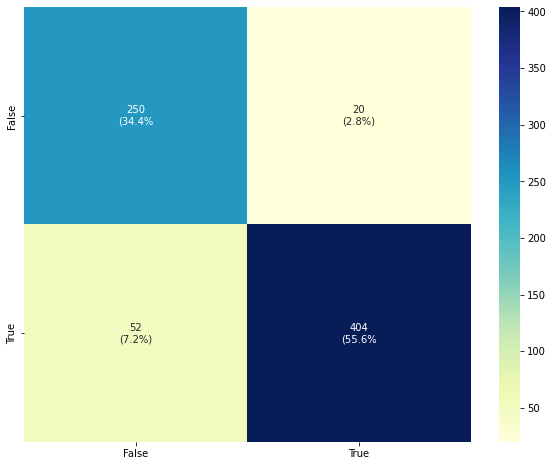

In [ ]:
plt.figure(figsize=(10,8))

percentages = (matrix / np.sum(matrix)) * 100
percentages = np.round(percentages, decimals=1)

annotations = np.empty((matrix.shape[0], matrix.shape[1]), dtype='U10')
for i in range(len(matrix)):
    for j in range(len(matrix)):
        annotations[i, j] = '{}\n({:.1f}%)'.format(matrix[i, j], percentages[i, j])

conf_matrix = sns.heatmap(matrix, annot = annotations, fmt='', cmap ='YlGnBu')
conf_matrix.xaxis.set_ticklabels(['False','True'])
conf_matrix.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       270
           1       0.95      0.89      0.92       456

    accuracy                           0.90       726
   macro avg       0.89      0.91      0.90       726
weighted avg       0.91      0.90      0.90       726



10 Fitur terpenting pada logistic regression yang sudah di hyperparameter

In [ ]:
feature_importance_logreg= pd.DataFrame(logreg_hyper.coef_[0])
feature_importance_logreg['label'] = X_train.columns
feature_importance_logreg.sort_values(by=0,ascending=False).head(10).reset_index(drop=True)

0                                           label
0  2.903075             Curricular units 2nd sem (approved)
1  2.001040                         Tuition fees up to date
2  1.957878             Curricular units 1st sem (approved)
3  0.663235                              Scholarship holder
4  0.389450                Curricular units 2nd sem (grade)
5  0.112774  Curricular units 1st sem (without evaluations)
6  0.110691  Curricular units 2nd sem (without evaluations)
7  0.060761                                  Marital status
8  0.049708                             Mother's occupation
9  0.027527                          Previous qualification

#### Hasil Decision Tree setelah Hyperparameter

Top 3 Parameter Decision Tree

In [ ]:
results_dt

param_clf  \
2  DecisionTreeClassifier()   
1  DecisionTreeClassifier()   
4  DecisionTreeClassifier()   

                                              params  mean_test_score  \
2  {'clf': DecisionTreeClassifier(), 'clf__max_de...         0.885332   
1  {'clf': DecisionTreeClassifier(), 'clf__max_de...         0.882915   
4  {'clf': DecisionTreeClassifier(), 'clf__max_de...         0.878443   

   mean_train_score  
2          0.906336  
1          0.892734  
4          0.963843

In [ ]:
best_dt_param = results_dt['params'].iloc[0]
best_dt_param

{'clf': DecisionTreeClassifier(), 'clf__max_depth': 5, 'clf__max_features': 10}

In [ ]:
dtree_hyper= DecisionTreeClassifier(max_depth=best_dt_param['clf__max_depth'], max_features = best_dt_param['clf__max_features'])
dtree_hyper.fit(X_train, Y_train)
print(dtree_hyper.score(X_train,Y_train))
print(dtree_hyper.score(X_test,Y_test))

0.8980716253443526
0.8677685950413223


In [ ]:
scores = cross_val_score(dtree_hyper, X_train, Y_train, cv = cross_val)
print("Decision Tree Tuning: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Decision Tree Tuning: 0.87 (+/- 0.02)


In [ ]:
pred = dtree_hyper.predict(X_test)

In [ ]:
matrix = confusion_matrix(pred, Y_test)

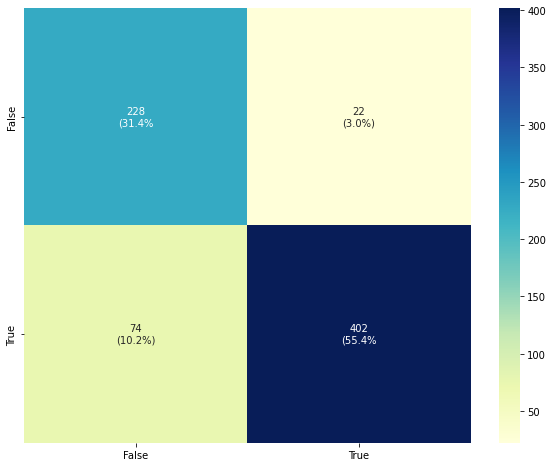

In [ ]:
plt.figure(figsize=(10,8))

percentages = (matrix / np.sum(matrix)) * 100
percentages = np.round(percentages, decimals=1)

annotations = np.empty((matrix.shape[0], matrix.shape[1]), dtype='U10')
for i in range(len(matrix)):
    for j in range(len(matrix)):
        annotations[i, j] = '{}\n({:.1f}%)'.format(matrix[i, j], percentages[i, j])

conf_matrix = sns.heatmap(matrix, annot = annotations, fmt='', cmap ='YlGnBu')
conf_matrix.xaxis.set_ticklabels(['False','True'])
conf_matrix.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.75      0.91      0.83       250
           1       0.95      0.84      0.89       476

    accuracy                           0.87       726
   macro avg       0.85      0.88      0.86       726
weighted avg       0.88      0.87      0.87       726



10 Fitur terpenting pada Decision Tree yang sudah di hyperparameter

In [ ]:
feature_importance_dt = pd.DataFrame(dtree_hyper.feature_importances_)
feature_importance_dt['label'] = X_train.columns
feature_importance_dt.sort_values(by=0,ascending=False).head(10).reset_index(drop=True)

0                                   label
0  0.695760     Curricular units 1st sem (approved)
1  0.061647     Curricular units 2nd sem (approved)
2  0.058210                 Tuition fees up to date
3  0.047543                                  Course
4  0.042253        Curricular units 2nd sem (grade)
5  0.038893                                  Debtor
6  0.011606  Curricular units 2nd sem (evaluations)
7  0.011122                                     GDP
8  0.010232                      Scholarship holder
9  0.004245        Curricular units 1st sem (grade)

#### Hasil Random Forest setelah Hyperparameter

Top 3 Parameter Random Forest

In [ ]:
results_rf

param_clf  \
248  RandomForestClassifier()   
330  RandomForestClassifier()   
243  RandomForestClassifier()   

                                                params  mean_test_score  \
248  {'clf': RandomForestClassifier(), 'clf__max_de...         0.888774   
330  {'clf': RandomForestClassifier(), 'clf__max_de...         0.888773   
243  {'clf': RandomForestClassifier(), 'clf__max_de...         0.886707   

     mean_train_score  
248          0.889032  
330          0.889119  
243          0.889463

In [ ]:
best_rf_param = results_rf['params'].iloc[0]
best_rf_param

{'clf': RandomForestClassifier(),
 'clf__max_depth': 12,
 'clf__max_features': 10,
 'clf__max_leaf_nodes': 5,
 'clf__min_samples_split': 3,
 'clf__n_estimators': 200}

In [ ]:
rfc_hyper= RandomForestClassifier(max_depth= best_rf_param['clf__max_depth'], max_features = best_rf_param['clf__max_features'], n_estimators = best_rf_param['clf__n_estimators'], min_samples_split = best_rf_param['clf__min_samples_split'], max_leaf_nodes = best_rf_param['clf__max_leaf_nodes'])
rfc_hyper.fit(X_train, Y_train)
print(rfc_hyper.score(X_train,Y_train))
print(rfc_hyper.score(X_test,Y_test))

0.8880853994490359
0.8884297520661157


In [ ]:
scores = cross_val_score(rfc_hyper, X_train, Y_train, cv = cross_val)
print("Random Forest Tuning: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Random Forest Tuning: 0.89 (+/- 0.01)


In [ ]:
pred = rfc_hyper.predict(X_test)

In [ ]:
matrix = confusion_matrix(pred, Y_test)

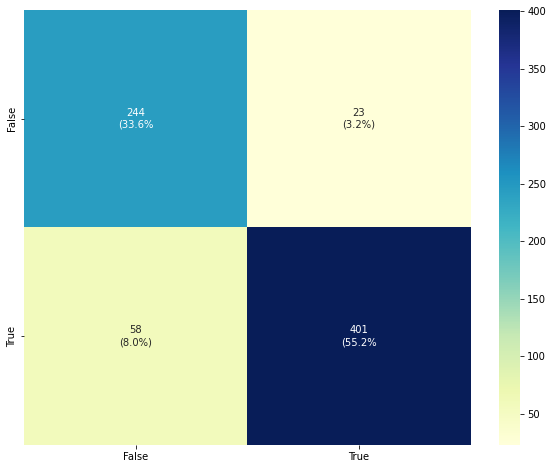

In [ ]:
plt.figure(figsize=(10,8))

percentages = (matrix / np.sum(matrix)) * 100
percentages = np.round(percentages, decimals=1)

annotations = np.empty((matrix.shape[0], matrix.shape[1]), dtype='U10')
for i in range(len(matrix)):
    for j in range(len(matrix)):
        annotations[i, j] = '{}\n({:.1f}%)'.format(matrix[i, j], percentages[i, j])

conf_matrix = sns.heatmap(matrix, annot = annotations, fmt='', cmap ='YlGnBu')
conf_matrix.xaxis.set_ticklabels(['False','True'])
conf_matrix.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       267
           1       0.95      0.87      0.91       459

    accuracy                           0.89       726
   macro avg       0.88      0.89      0.88       726
weighted avg       0.90      0.89      0.89       726



10 Fitur terpenting pada Random Forest yang sudah di hyperparameter

In [ ]:
feature_importance_rfc = pd.DataFrame(rfc_hyper.feature_importances_)
feature_importance_rfc['label'] = X_train.columns
feature_importance_rfc.sort_values(by=0,ascending=False).head(10).reset_index(drop=True)

0                                   label
0  0.401078     Curricular units 2nd sem (approved)
1  0.184174     Curricular units 1st sem (approved)
2  0.176542        Curricular units 2nd sem (grade)
3  0.081171        Curricular units 1st sem (grade)
4  0.071221                 Tuition fees up to date
5  0.016175                       Age at enrollment
6  0.014224  Curricular units 2nd sem (evaluations)
7  0.013758     Curricular units 2nd sem (enrolled)
8  0.011883     Curricular units 1st sem (enrolled)
9  0.008736                                  Course

# Evaluation

## Evaluasi

Hasil awal tanpa hyperparameter:

*   Logistic Regression memiliki akurasi sebesar 90%
*   Decision Tree mengalami overfitting dan akurasi sebesar 85%
*   Random Forest mengalami overfitting dan akurasi sebesar 89%

<br>
Hasil setelah hyperparameter: 


*   Logistic Regression memiliki akurasi tetap sebesar 90% dengan hyperparameter


```
LogisticRegression(C=1,solver='lbfgs', penalty='l2')
```


*   Decision Tree sudah tidak overfitting dan mengalami peningkatan akurasi sebesar 4% menjadi 89% dengan hyperparameter


```
DecisionTreeClassifier(max_depth = 5, max_features = 10)
```

*   Random Forest sudah tidak overfitting dan mengalami penurunan akurasi sebesar 1% menjadi 88% dengan hyperparameter

```
RandomForestClassifier(max_depth= 15,max_features= 8, n_estimators= 200)
```








### Mencari fitur terpenting

In [ ]:
# Merge dataframes
merged = feature_importance_rfc.merge(feature_importance_dt, on='label').merge(feature_importance_logreg, on='label')
merged.columns = ['importance_rfc', 'label', 'importance_dtree', 'importance_logreg']

# Hitung rata-rata importance dari ketiga model
merged['avg_importance'] = (merged['importance_rfc'] + merged['importance_dtree'] + abs(merged['importance_logreg']))/3

# Tampilkan 10 fitur dengan nilai importance tertinggi
merged.sort_values(by='avg_importance', ascending=False).head(10)

importance_rfc                                label  importance_dtree  \
10        0.401078  Curricular units 2nd sem (approved)          0.061647   
4         0.184174  Curricular units 1st sem (approved)          0.695760   
28        0.071221              Tuition fees up to date          0.058210   
27        0.003780                               Debtor          0.038893   
8         0.013758  Curricular units 2nd sem (enrolled)          0.000000   
2         0.011883  Curricular units 1st sem (enrolled)          0.003110   
30        0.008057                   Scholarship holder          0.010232   
11        0.176542     Curricular units 2nd sem (grade)          0.042253   
5         0.081171     Curricular units 1st sem (grade)          0.004245   
29        0.000118                               Gender          0.003498   

    importance_logreg  avg_importance  
10           2.903075        1.121933  
4            1.957878        0.945937  
28           2.001040        0.710157  
27          -1.330387        0.457687  
8           -1.272468        0.428742  
2           -0.867227        0.294073  
30           0.663235        0.227175  
11           0.389450        0.202748  
5           -0.416572        0.167329  
29          -0.475996        0.159871

10 Fitur diatas merupakan hal utama yang mempengaruhi kesuksesan akademik mahasiswa berdasarkan rata-rata fitur yang sering digunakan oleh ketiga model

## Kesimpulan